In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [2]:
url = 'https://raw.githubusercontent.com/DataGlacier/DataSets/main/Cab_Data.csv'
cab_df = pd.read_csv(url, index_col=0)
cab_df.head(5)

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
Transaction ID,,,,,,
10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [3]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 10000011 to 10440107
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date of Travel  359392 non-null  int64  
 1   Company         359392 non-null  object 
 2   City            359392 non-null  object 
 3   KM Travelled    359392 non-null  float64
 4   Price Charged   359392 non-null  float64
 5   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [4]:
url = 'https://raw.githubusercontent.com/DataGlacier/DataSets/main/City.csv'
city_df = pd.read_csv(url, index_col=0)
city_df.head(5)

,Population,Users
City,,
NEW YORK NY,"8,405,837","302,149"
CHICAGO IL,"1,955,130","164,468"
LOS ANGELES CA,"1,595,037","144,132"
MIAMI FL,"1,339,155","17,675"
SILICON VALLEY,"1,177,609","27,247"


In [5]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, NEW YORK NY to BOSTON MA
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Population  20 non-null     object
 1   Users       20 non-null     object
dtypes: object(2)
memory usage: 480.0+ bytes


In [6]:
city_df['Population'] = city_df['Population'].replace(",", "", regex=True).astype(int)
city_df['Users'] = city_df['Users'].replace(",", "", regex=True).astype(int)

city_df.head(5)

,Population,Users
City,,
NEW YORK NY,8405837,302149
CHICAGO IL,1955130,164468
LOS ANGELES CA,1595037,144132
MIAMI FL,1339155,17675
SILICON VALLEY,1177609,27247


In [7]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, NEW YORK NY to BOSTON MA
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Population  20 non-null     int64
 1   Users       20 non-null     int64
dtypes: int64(2)
memory usage: 480.0+ bytes


In [8]:
url = 'https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv'
customer_id_df = pd.read_csv(url, index_col=0)
customer_id_df.head(5)

,Gender,Age,Income (USD/Month)
Customer ID,,,
29290,Male,28,10813
27703,Male,27,9237
28712,Male,53,11242
28020,Male,23,23327
27182,Male,33,8536


In [9]:
customer_id_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49171 entries, 29290 to 39761
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gender              49171 non-null  object
 1   Age                 49171 non-null  int64 
 2   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [10]:
url = 'https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv'
transaction_id_df = pd.read_csv(url, index_col=0)
transaction_id_df.head(5)

,Customer ID,Payment_Mode
Transaction ID,,
10000011,29290,Card
10000012,27703,Card
10000013,28712,Cash
10000014,28020,Cash
10000015,27182,Card


In [11]:
transaction_id_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440098 entries, 10000011 to 10440108
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Customer ID   440098 non-null  int64 
 1   Payment_Mode  440098 non-null  object
dtypes: int64(1), object(1)
memory usage: 10.1+ MB


In [12]:
df= cab_df.merge(transaction_id_df, on= 'Transaction ID').merge(customer_id_df, on ='Customer ID').merge(city_df, on = 'City')
df.head(5)

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date of Travel      359392 non-null  int64  
 1   Company             359392 non-null  object 
 2   City                359392 non-null  object 
 3   KM Travelled        359392 non-null  float64
 4   Price Charged       359392 non-null  float64
 5   Cost of Trip        359392 non-null  float64
 6   Customer ID         359392 non-null  int64  
 7   Payment_Mode        359392 non-null  object 
 8   Gender              359392 non-null  object 
 9   Age                 359392 non-null  int64  
 10  Income (USD/Month)  359392 non-null  int64  
 11  Population          359392 non-null  int64  
 12  Users               359392 non-null  int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 38.4+ MB


In [14]:
df.to_csv('cab_investment_data.csv')

In [15]:
df['Profit'] = df['Price Charged'] - df['Cost of Trip']
df['Date'] = pd.to_datetime(df['Date of Travel'], origin='1899-12-30', unit='D')
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Year'] = df['Date'].dt.year
df['Year'].head(5)

0    2016
1    2018
2    2018
3    2016
4    2018
Name: Year, dtype: int64

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
avg_profit_per_km = df.groupby(['Year', 'Company'])['Profit'].sum() / df.groupby(['Year', 'Company'])['KM Travelled'].sum()
avg_profit_per_km = avg_profit_per_km.reset_index().rename(columns={0: 'Avg Profit per KM'})

profit_percentage_yearwise = df.groupby(['Year', 'Company'])['Profit'].sum() / df.groupby('Year')['Profit'].sum() * 100
profit_percentage_yearwise = profit_percentage_yearwise.reset_index().rename(columns={'Profit': 'Profit Percentage'})

citywise_profitable_rides_percentage = df[df['Profit'] > 0].groupby(['City', 'Company']).size() / df.groupby('City').size() * 100
citywise_profitable_rides_percentage = citywise_profitable_rides_percentage.reset_index().rename(columns={0: 'Profitable Rides Percentage'})

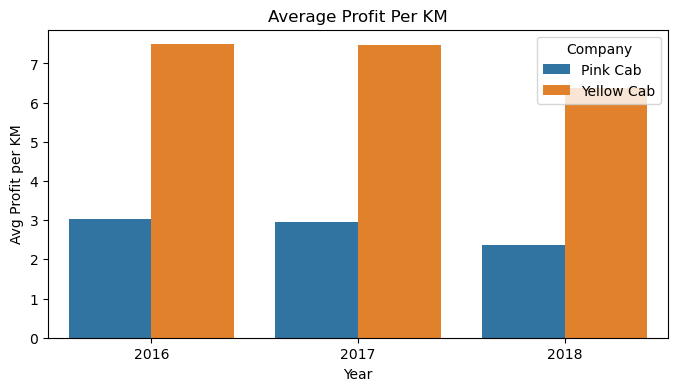

In [18]:
plt.figure(figsize=(8, 4))
sns.barplot(data=avg_profit_per_km, x='Year', y='Avg Profit per KM', hue='Company')
plt.title('Average Profit Per KM')
plt.show()

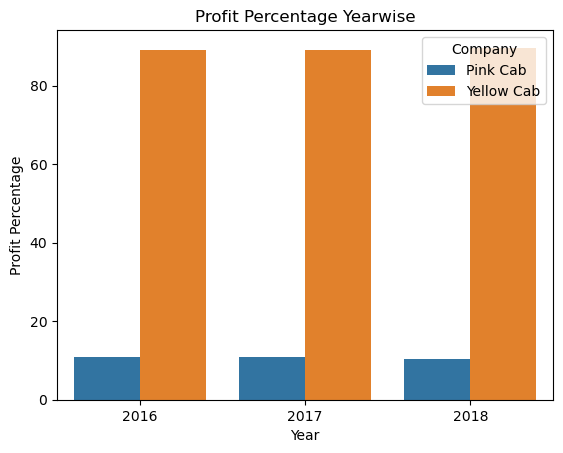

In [19]:
sns.barplot(data=profit_percentage_yearwise, x='Year', y='Profit Percentage', hue='Company')
plt.title('Profit Percentage Yearwise')
plt.show()

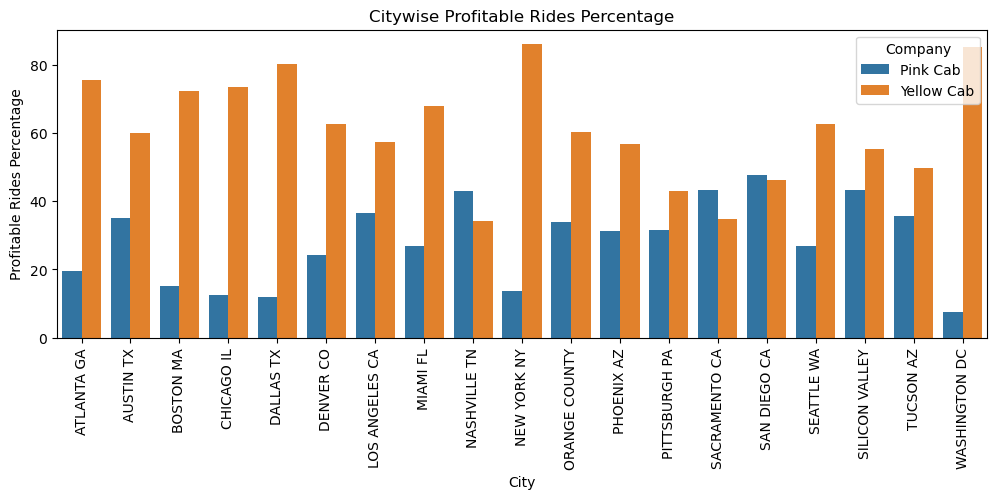

In [20]:
plt.figure(figsize=(12, 4))
sns.barplot(data=citywise_profitable_rides_percentage, x='City', y='Profitable Rides Percentage', hue='Company')
plt.title('Citywise Profitable Rides Percentage')
plt.xticks(rotation=90)
plt.show()

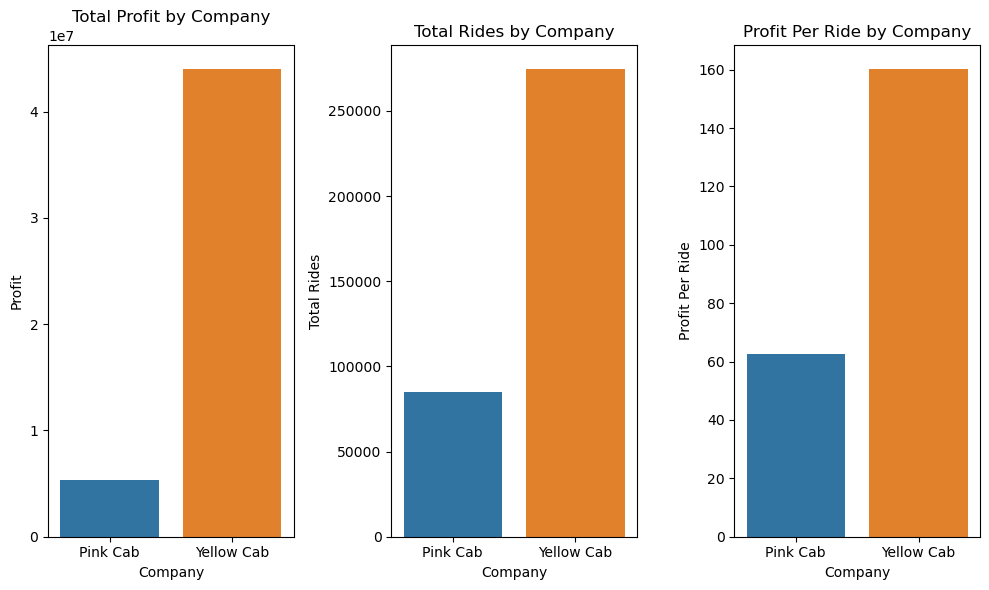

In [21]:
total_profit = df.groupby('Company')['Profit'].sum()
total_rides = df.groupby('Company').size()
profit_per_ride = total_profit / total_rides

summary_table = pd.DataFrame({
    'Profit': total_profit,
    'Total Rides': total_rides,
    'Profit Per Ride': profit_per_ride
})


fig, axes = plt.subplots(1, 3, figsize=(10, 6))

sns.barplot(x=summary_table.index, y=summary_table['Profit'], ax=axes[0])
axes[0].set_title('Total Profit by Company')
axes[0].set_ylabel('Profit')

sns.barplot(x=summary_table.index, y=summary_table['Total Rides'], ax=axes[1])
axes[1].set_title('Total Rides by Company')
axes[1].set_ylabel('Total Rides')

sns.barplot(x=summary_table.index, y=summary_table['Profit Per Ride'], ax=axes[2])
axes[2].set_title('Profit Per Ride by Company')
axes[2].set_ylabel('Profit Per Ride')

plt.tight_layout()
plt.show()

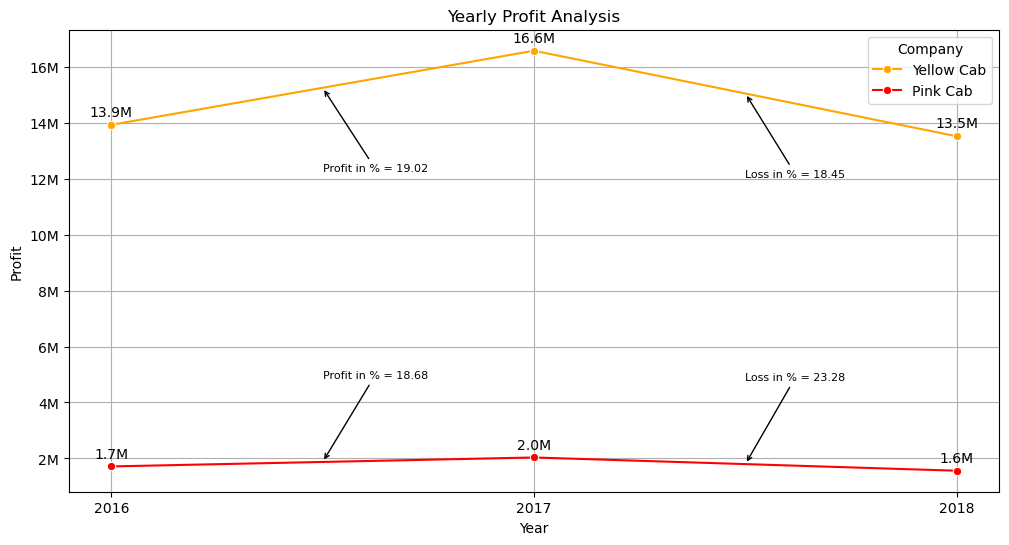

In [22]:
yearly_profit = df.groupby(['Year', 'Company'])['Profit'].sum().reset_index()

plt.figure(figsize=(12, 6))

sns.lineplot(data=yearly_profit[yearly_profit['Company'] == 'Yellow Cab'], x='Year', y='Profit', marker='o', label='Yellow Cab', color='orange')

sns.lineplot(data=yearly_profit[yearly_profit['Company'] == 'Pink Cab'], x='Year', y='Profit', marker='o', label='Pink Cab', color='red')

for company in yearly_profit['Company'].unique():
    data = yearly_profit[yearly_profit['Company'] == company]
    for i, row in data.iterrows():
        plt.text(
            row['Year'], 
            row['Profit'] + 3e5,
            f"{row['Profit'] / 1e6:.1f}M",
            ha='center'
        )

for company in yearly_profit['Company'].unique():
    data = yearly_profit[yearly_profit['Company'] == company]
    for i in range(1, len(data)):
        prev = data.iloc[i - 1]
        curr = data.iloc[i]
        mid_year = (prev['Year'] + curr['Year']) / 2
        change_percent = ((curr['Profit'] - prev['Profit']) / prev['Profit']) * 100
        annotation = f"Profit in % = {change_percent:.2f}" if change_percent > 0 else f"Loss in % = {-change_percent:.2f}"
        
        plt.annotate(
            annotation,
            xy=(mid_year, (prev['Profit'] + curr['Profit']) / 2),
            xytext=(mid_year, (prev['Profit'] + curr['Profit']) / 2 - 3e6 if company == 'Yellow Cab' else (prev['Profit'] + curr['Profit']) / 2 + 3e6),
            arrowprops=dict(facecolor='black', arrowstyle="->"),
            fontsize=8
        )

plt.xticks([2016, 2017, 2018])

plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e6)) + 'M'))

plt.title('Yearly Profit Analysis')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.legend(title='Company')
plt.grid(True)

plt.show()


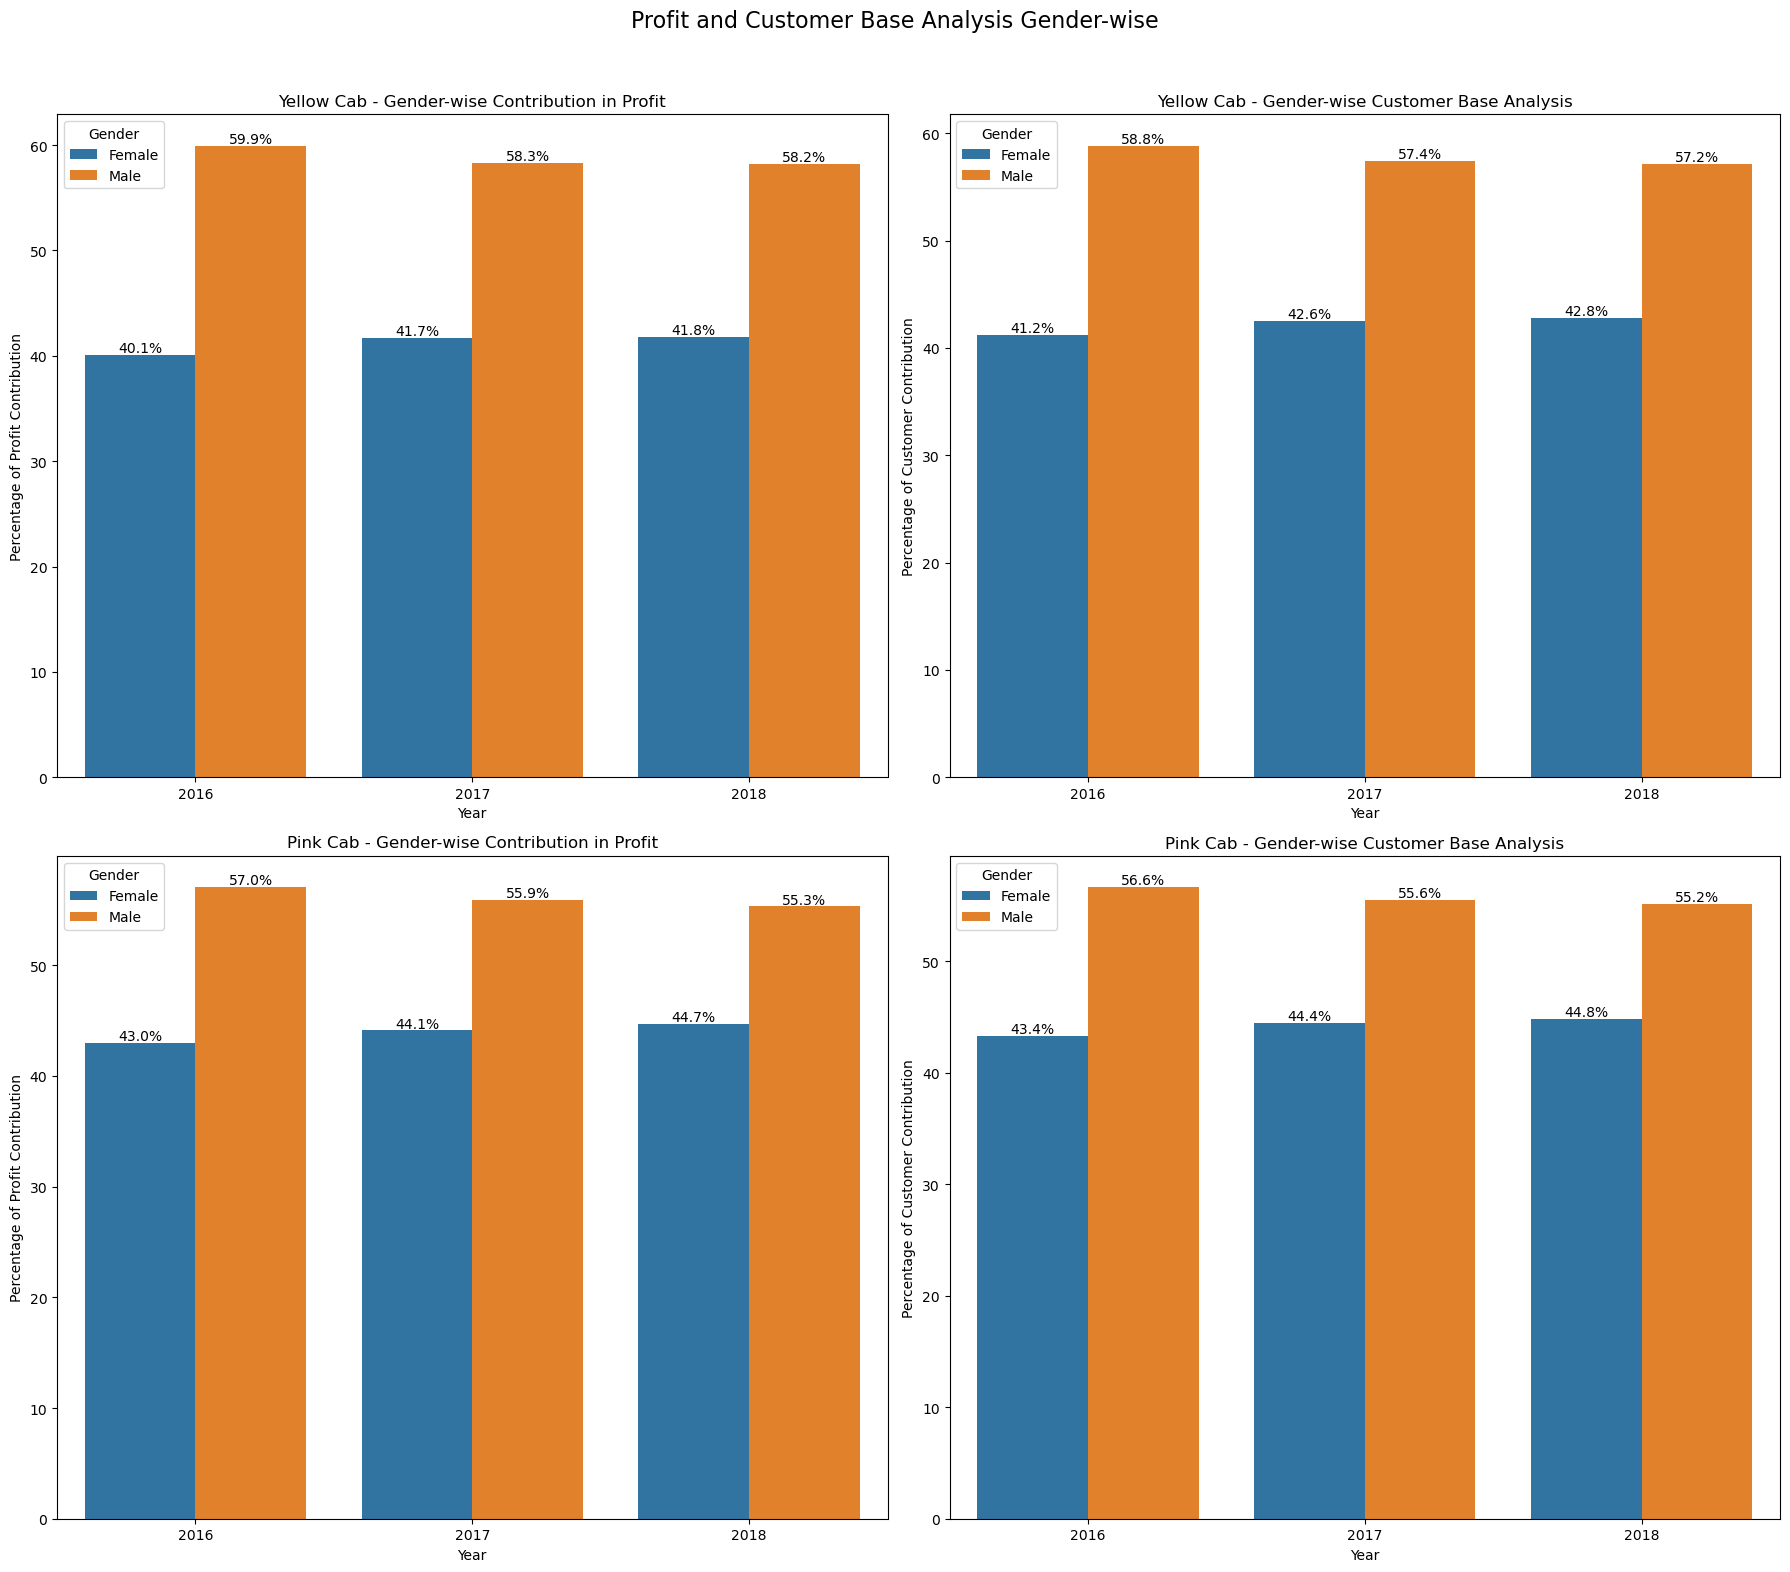

In [23]:
profit_contribution = df.groupby(['Year', 'Company', 'Gender'])['Profit'].sum().reset_index()
total_profit_by_year_company = df.groupby(['Year', 'Company'])['Profit'].sum().reset_index()
total_profit_by_year_company = total_profit_by_year_company.rename(columns={'Profit': 'Total Profit'})
profit_contribution = profit_contribution.merge(total_profit_by_year_company, on=['Year', 'Company'])
profit_contribution['Profit Contribution (%)'] = (profit_contribution['Profit'] / profit_contribution['Total Profit']) * 100

customer_contribution = df.groupby(['Year', 'Company', 'Gender'])['Customer ID'].count().reset_index()
total_customers_by_year_company = df.groupby(['Year', 'Company'])['Customer ID'].count().reset_index()
total_customers_by_year_company = total_customers_by_year_company.rename(columns={'Customer ID': 'Total Customers'})
customer_contribution = customer_contribution.merge(total_customers_by_year_company, on=['Year', 'Company'])
customer_contribution['Customer Contribution (%)'] = (customer_contribution['Customer ID'] / customer_contribution['Total Customers']) * 100

profit_contribution_yellow = profit_contribution[profit_contribution['Company'] == 'Yellow Cab']
profit_contribution_pink = profit_contribution[profit_contribution['Company'] == 'Pink Cab']

customer_contribution_yellow = customer_contribution[customer_contribution['Company'] == 'Yellow Cab']
customer_contribution_pink = customer_contribution[customer_contribution['Company'] == 'Pink Cab']

def annotate_bars(ax, df, column):
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.1f}%", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', 
                    xytext=(0, 5), 
                    textcoords='offset points')

fig, axes = plt.subplots(2, 2, figsize=(18, 16))

ax1 = sns.barplot(data=profit_contribution_yellow, x='Year', y='Profit Contribution (%)', hue='Gender', ax=axes[0, 0])
axes[0, 0].set_title('Yellow Cab - Gender-wise Contribution in Profit')
axes[0, 0].set_ylabel('Percentage of Profit Contribution')
annotate_bars(ax1, profit_contribution_yellow, 'Profit Contribution (%)')

ax2 = sns.barplot(data=customer_contribution_yellow, x='Year', y='Customer Contribution (%)', hue='Gender', ax=axes[0, 1])
axes[0, 1].set_title('Yellow Cab - Gender-wise Customer Base Analysis')
axes[0, 1].set_ylabel('Percentage of Customer Contribution')
annotate_bars(ax2, customer_contribution_yellow, 'Customer Contribution (%)')

ax3 = sns.barplot(data=profit_contribution_pink, x='Year', y='Profit Contribution (%)', hue='Gender', ax=axes[1, 0])
axes[1, 0].set_title('Pink Cab - Gender-wise Contribution in Profit')
axes[1, 0].set_ylabel('Percentage of Profit Contribution')
annotate_bars(ax3, profit_contribution_pink, 'Profit Contribution (%)')

ax4 = sns.barplot(data=customer_contribution_pink, x='Year', y='Customer Contribution (%)', hue='Gender', ax=axes[1, 1])
axes[1, 1].set_title('Pink Cab - Gender-wise Customer Base Analysis')
axes[1, 1].set_ylabel('Percentage of Customer Contribution')
annotate_bars(ax4, customer_contribution_pink, 'Customer Contribution (%)')

plt.suptitle('Profit and Customer Base Analysis Gender-wise', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


/var/folders/g8/31llxq_d46gdynjyr71stwdr0000gn/T/ipykernel_57033/1987911603.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=profit_income_class, x='Year', y='Profit', hue='Income Class', ci=None, ax=axes[0])
/var/folders/g8/31llxq_d46gdynjyr71stwdr0000gn/T/ipykernel_57033/1987911603.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=customer_income_class, x='Company', y='Customer Contribution (%)', hue='Income Class', ci=None, ax=axes[1])


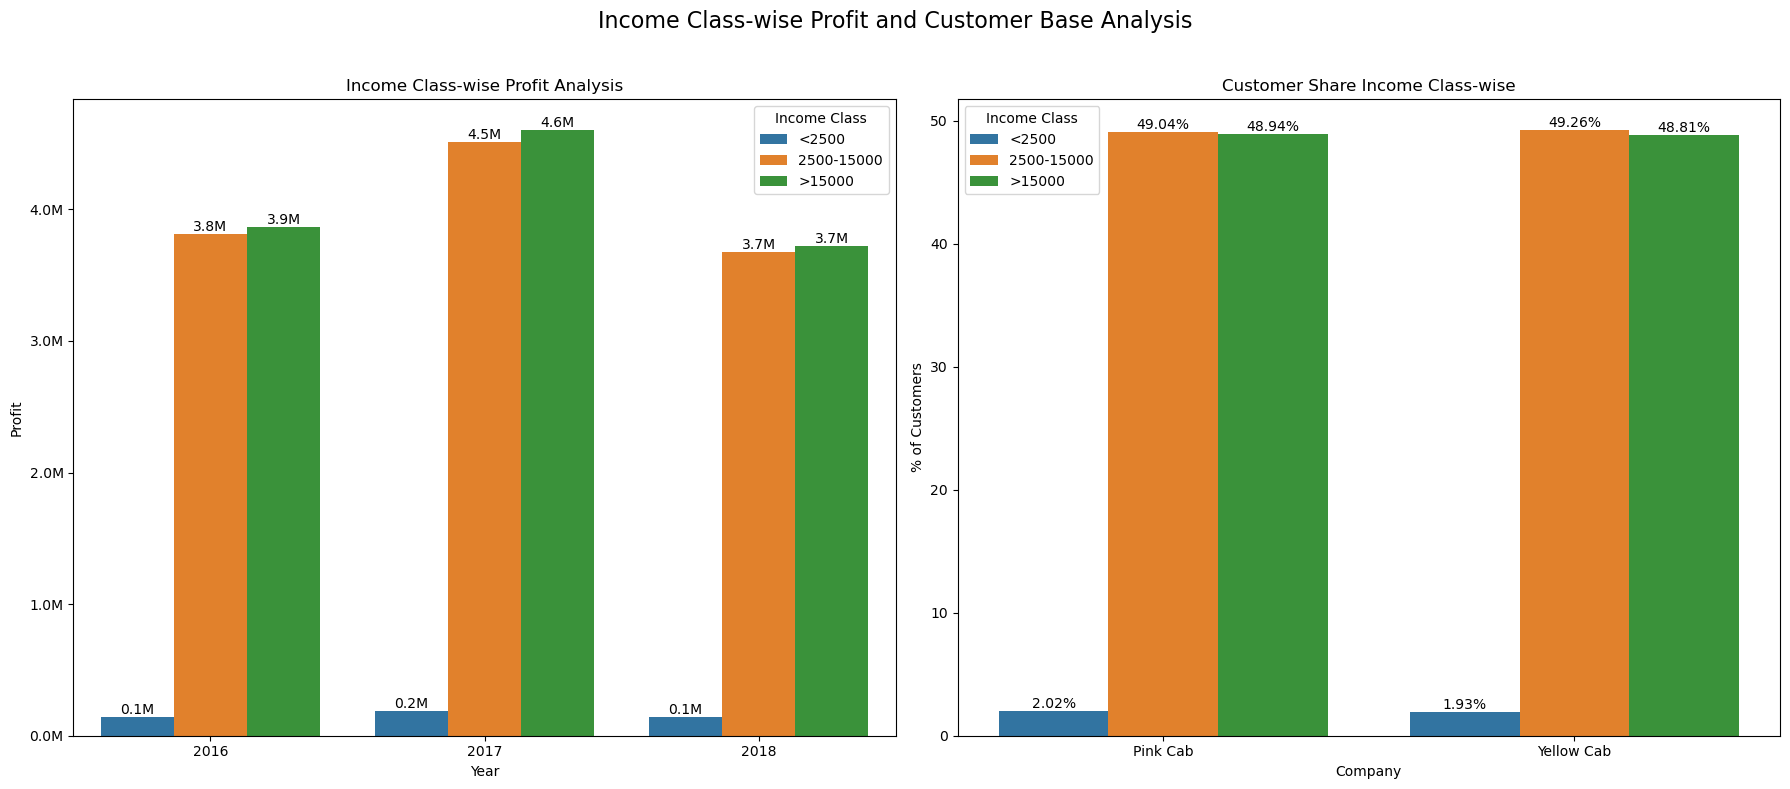

In [24]:
income_classes = pd.cut(df['Income (USD/Month)'], bins=[0, 2500, 15000, df['Income (USD/Month)'].max()], labels=['<2500', '2500-15000', '>15000'])

df['Income Class'] = income_classes

profit_income_class = df.groupby(['Year', 'Company', 'Income Class'])['Profit'].sum().reset_index()

customer_income_class = df.groupby(['Company', 'Income Class'])['Customer ID'].count().reset_index()
total_customers_by_company = df.groupby(['Company'])['Customer ID'].count().reset_index()
total_customers_by_company = total_customers_by_company.rename(columns={'Customer ID': 'Total Customers'})
customer_income_class = customer_income_class.merge(total_customers_by_company, on='Company')
customer_income_class['Customer Contribution (%)'] = (customer_income_class['Customer ID'] / customer_income_class['Total Customers']) * 100

def millions(x, pos):
    return f'{x*1e-6:.1f}M'

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.barplot(data=profit_income_class, x='Year', y='Profit', hue='Income Class', ci=None, ax=axes[0])
axes[0].set_title('Income Class-wise Profit Analysis')
axes[0].set_ylabel('Profit')

for p in axes[0].patches:
    height = p.get_height()
    axes[0].annotate(f'{height/1e6:.1f}M', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

axes[0].yaxis.set_major_formatter(plt.FuncFormatter(millions))

sns.barplot(data=customer_income_class, x='Company', y='Customer Contribution (%)', hue='Income Class', ci=None, ax=axes[1])
axes[1].set_title('Customer Share Income Class-wise')
axes[1].set_ylabel('% of Customers')

for p in axes[1].patches:
    height = p.get_height()
    axes[1].annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.suptitle('Income Class-wise Profit and Customer Base Analysis', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


/var/folders/g8/31llxq_d46gdynjyr71stwdr0000gn/T/ipykernel_57033/3733195937.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=profit_age_group, x='Year', y='Profit', hue='Age Group', ci=None, ax=axes[0])
/var/folders/g8/31llxq_d46gdynjyr71stwdr0000gn/T/ipykernel_57033/3733195937.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=customer_age_group, x='Year', y='Customer Contribution (%)', hue='Age Group', ci=None, ax=axes[1])


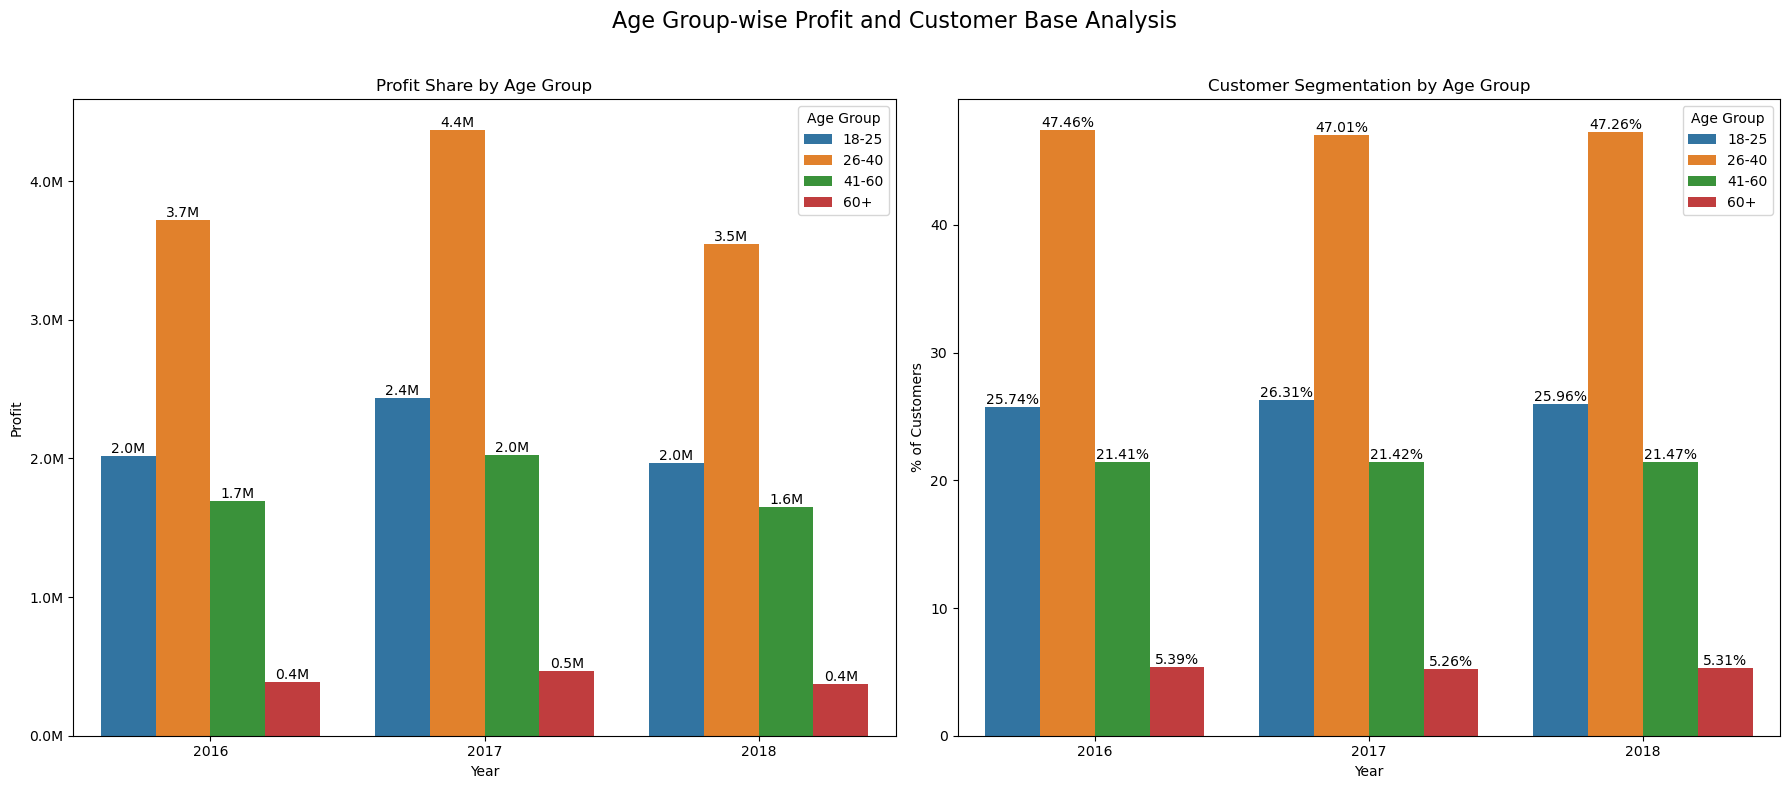

In [25]:
age_groups = pd.cut(df['Age'], bins=[0, 25, 40, 60, df['Age'].max()], labels=['18-25', '26-40', '41-60', '60+'])

df['Age Group'] = age_groups

profit_age_group = df.groupby(['Year', 'Company', 'Age Group'])['Profit'].sum().reset_index()

customer_age_group = df.groupby(['Year', 'Company', 'Age Group'])['Customer ID'].count().reset_index()
total_customers_by_year_company = df.groupby(['Year', 'Company'])['Customer ID'].count().reset_index()
total_customers_by_year_company = total_customers_by_year_company.rename(columns={'Customer ID': 'Total Customers'})
customer_age_group = customer_age_group.merge(total_customers_by_year_company, on=['Year', 'Company'])
customer_age_group['Customer Contribution (%)'] = (customer_age_group['Customer ID'] / customer_age_group['Total Customers']) * 100

def millions(x, pos):
    return f'{x*1e-6:.1f}M'

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.barplot(data=profit_age_group, x='Year', y='Profit', hue='Age Group', ci=None, ax=axes[0])
axes[0].set_title('Profit Share by Age Group')
axes[0].set_ylabel('Profit')

for p in axes[0].patches:
    height = p.get_height()
    axes[0].annotate(f'{height/1e6:.1f}M', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

axes[0].yaxis.set_major_formatter(plt.FuncFormatter(millions))

sns.barplot(data=customer_age_group, x='Year', y='Customer Contribution (%)', hue='Age Group', ci=None, ax=axes[1])
axes[1].set_title('Customer Segmentation by Age Group')
axes[1].set_ylabel('% of Customers')

for p in axes[1].patches:
    height = p.get_height()
    axes[1].annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.suptitle('Age Group-wise Profit and Customer Base Analysis', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

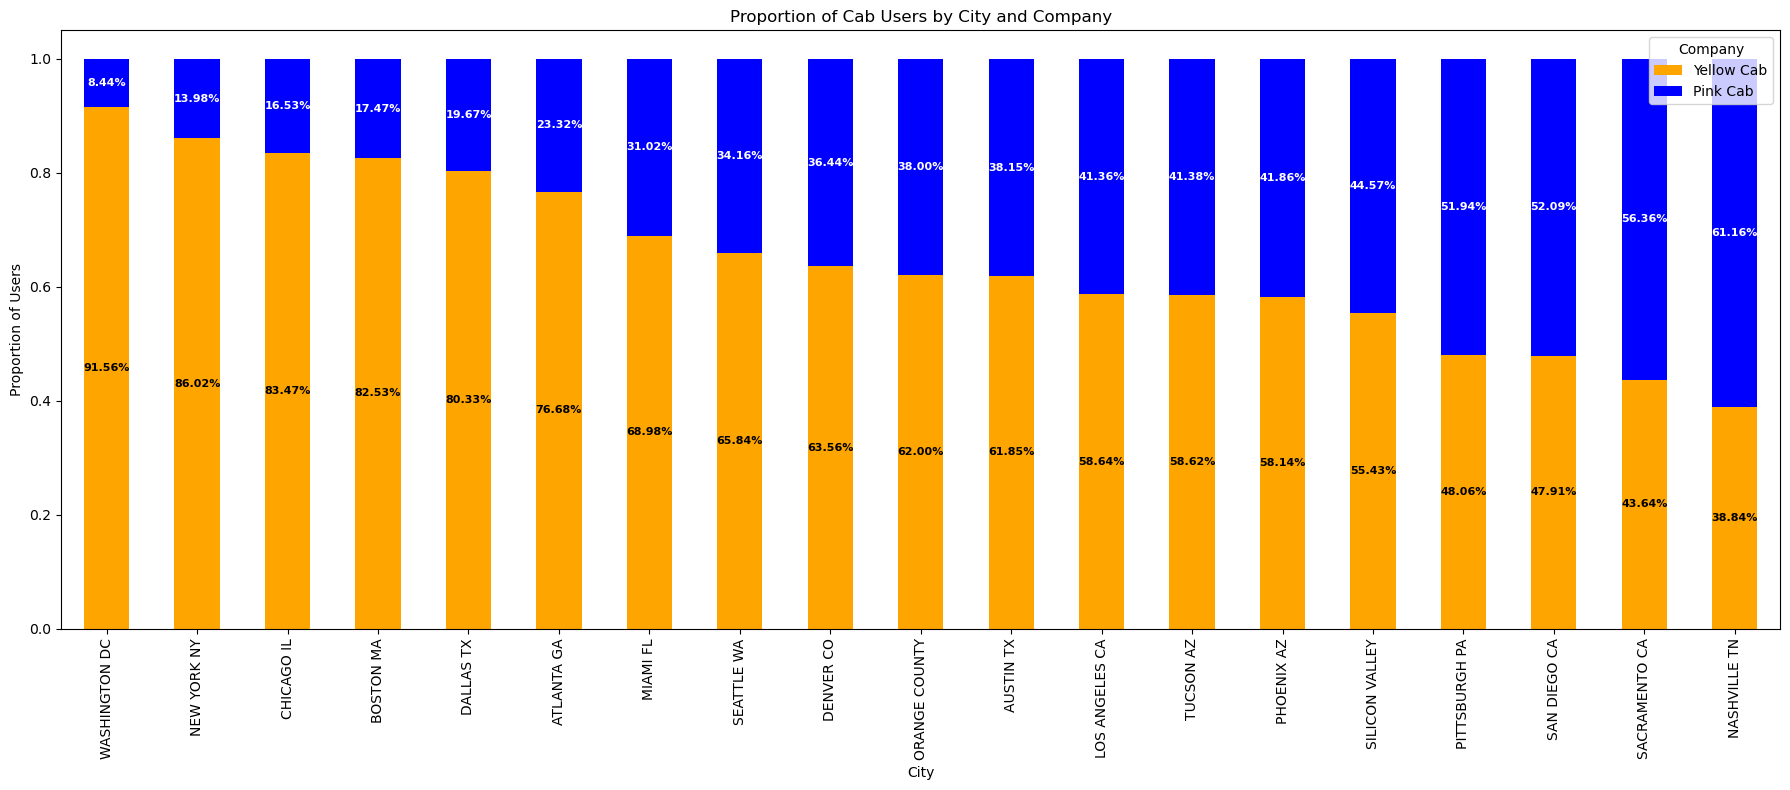

In [26]:
city_users = df.groupby(['City', 'Company'])['Users'].sum().unstack().fillna(0)

city_users['Total'] = city_users.sum(axis=1)
city_users['Yellow Cab Proportion'] = city_users['Yellow Cab'] / city_users['Total']
city_users['Pink Cab Proportion'] = city_users['Pink Cab'] / city_users['Total']
city_users = city_users.drop(columns=['Yellow Cab', 'Pink Cab', 'Total'])

city_users = city_users.sort_values(by='Yellow Cab Proportion', ascending=False)

plt.figure(figsize=(18, 8))

city_users.plot(kind='bar', stacked=True, color=['#FFA500', '#0000FF'], ax=plt.gca())

for i, city in enumerate(city_users.index):
    yellow_prop = city_users.loc[city, 'Yellow Cab Proportion']
    pink_prop = city_users.loc[city, 'Pink Cab Proportion']
    
    plt.text(i, yellow_prop / 2, f'{yellow_prop:.2%}', ha='center', va='center', color='black', fontsize=8, fontweight='bold')
    plt.text(i, yellow_prop + pink_prop / 2, f'{pink_prop:.2%}', ha='center', va='center', color='white', fontsize=8, fontweight='bold')

plt.xlabel('City')
plt.ylabel('Proportion of Users')
plt.title('Proportion of Cab Users by City and Company')
plt.legend(['Yellow Cab', 'Pink Cab'], title='Company', loc='upper right')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

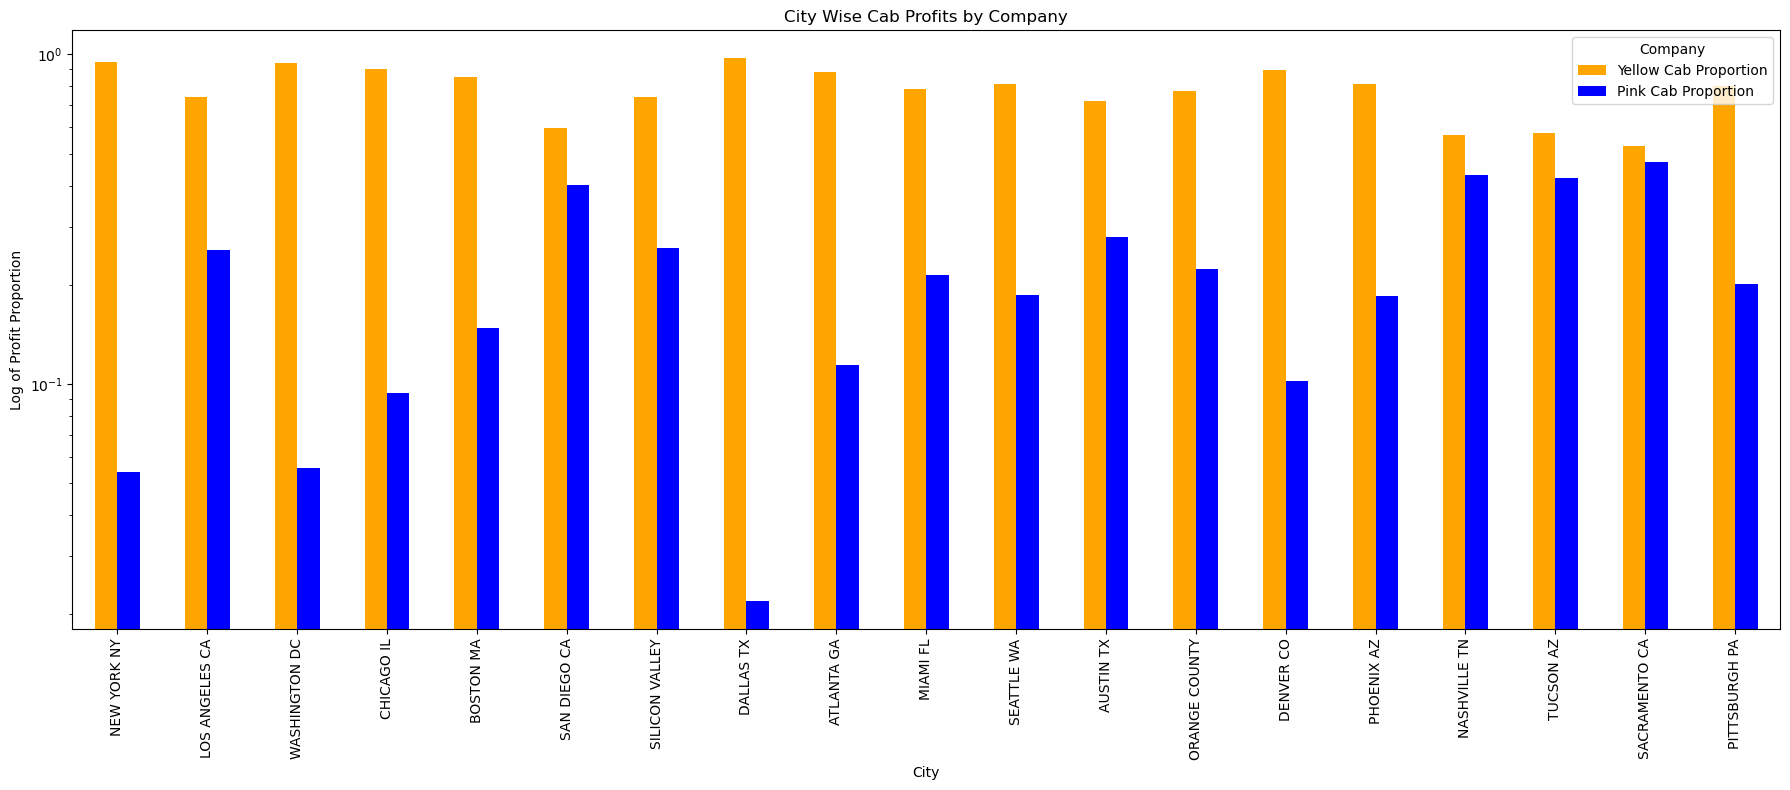

In [27]:
city_profits = df.groupby(['City', 'Company'])['Profit'].sum().unstack().fillna(0)

city_profits['Total'] = city_profits.sum(axis=1)
city_profits = city_profits.sort_values(by='Total', ascending=False)
city_profits = city_profits.drop(columns='Total')

city_profits['Total'] = city_profits.sum(axis=1)
city_profits['Yellow Cab Proportion'] = city_profits['Yellow Cab'] / city_profits['Total']
city_profits['Pink Cab Proportion'] = city_profits['Pink Cab'] / city_profits['Total']
city_profits = city_profits.drop(columns=['Yellow Cab', 'Pink Cab', 'Total'])

plt.figure(figsize=(18, 8))

city_profits.plot(kind='bar', color=['#FFA500', '#0000FF'], ax=plt.gca(), log=True)

plt.xlabel('City')
plt.ylabel('Log of Profit Proportion')
plt.title('City Wise Cab Profits by Company')
plt.legend(['Yellow Cab Proportion', 'Pink Cab Proportion'], title='Company', loc='upper right')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()


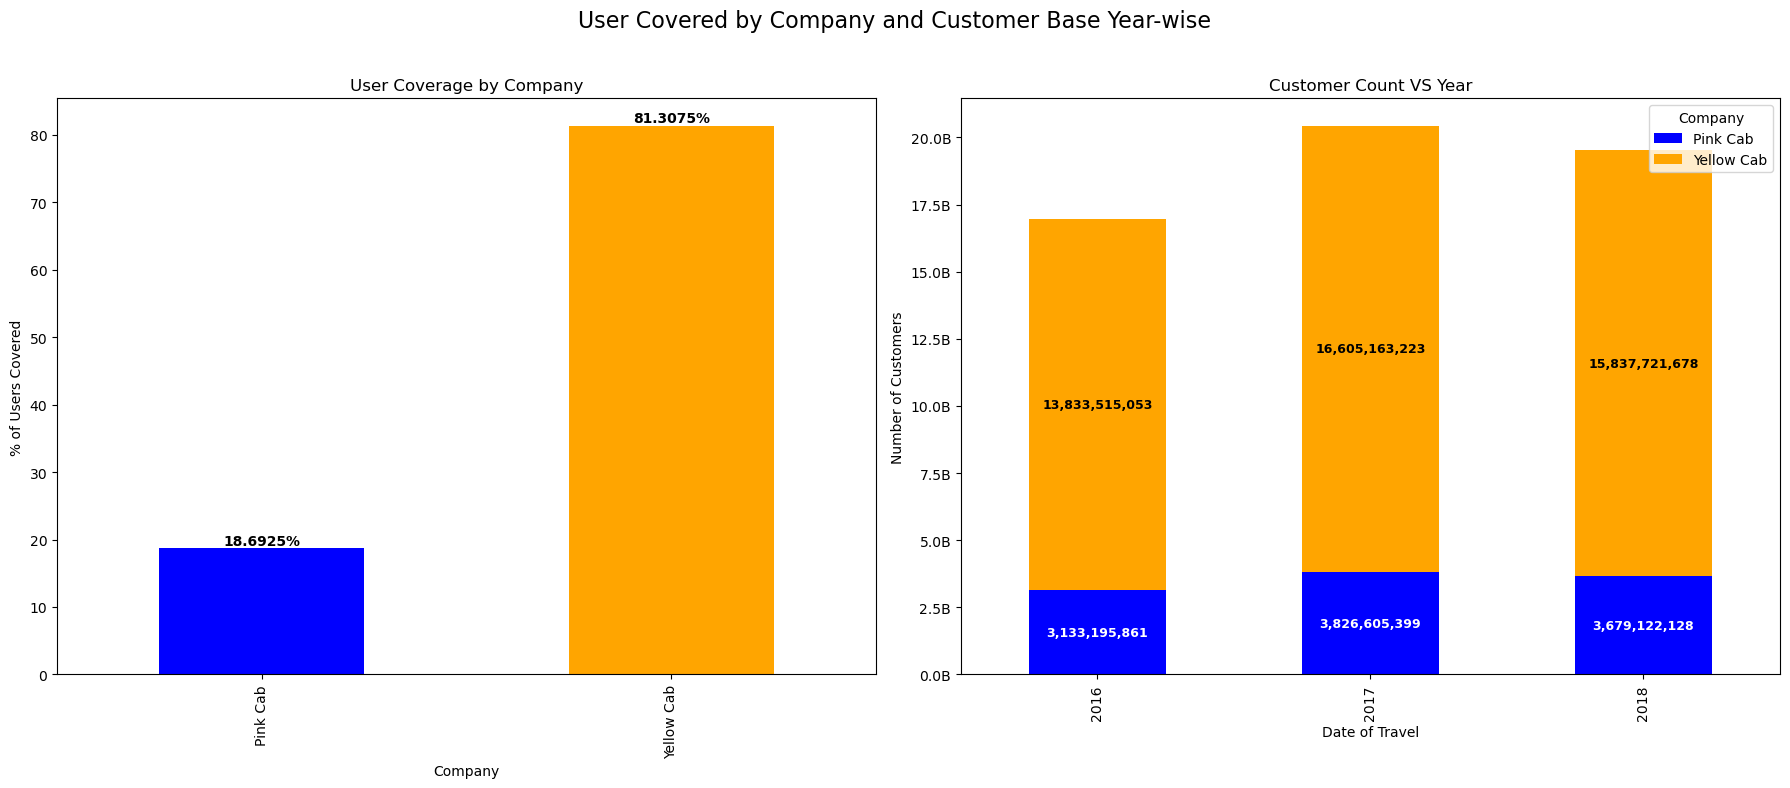

In [28]:
total_users = df['Users'].sum()
company_users = df.groupby('Company')['Users'].sum()
company_users_percentage = (company_users / total_users) * 100

yearly_customers = df.groupby(['Year', 'Company'])['Users'].sum().unstack().fillna(0)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

company_users_percentage.plot(kind='bar', color=['#0000FF', '#FFA500'], ax=axes[0])
for i, v in enumerate(company_users_percentage):
    axes[0].text(i, v + 0.1, f'{v:.4f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')
axes[0].set_title('User Coverage by Company')
axes[0].set_ylabel('% of Users Covered')
axes[0].set_xlabel('Company')

def billions(x, pos):
    return f'{x*1e-9:.1f}B'

yearly_customers.plot(kind='bar', stacked=True, color=['#0000FF', '#FFA500'], ax=axes[1])
for i, year in enumerate(yearly_customers.index):
    for company in yearly_customers.columns:
        value = yearly_customers.loc[year, company]
        if value > 0:
            color = 'white' if company == 'Pink Cab' else 'black'
            axes[1].text(i, value / 2 + yearly_customers.loc[year].cumsum()[company] - value, f'{value:,.0f}', ha='center', va='center', fontsize=9, fontweight='bold', color=color)
axes[1].set_title('Customer Count VS Year')
axes[1].set_ylabel('Number of Customers')
axes[1].set_xlabel('Date of Travel')
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(billions))
axes[1].legend(title='Company', loc='upper right')

plt.suptitle('User Covered by Company and Customer Base Year-wise', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

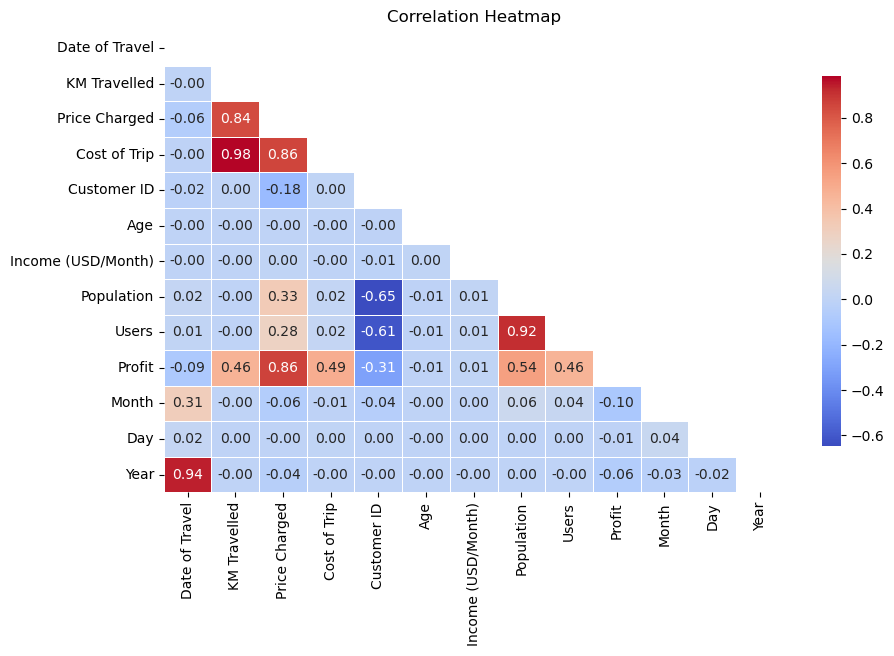

In [29]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 6))

sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

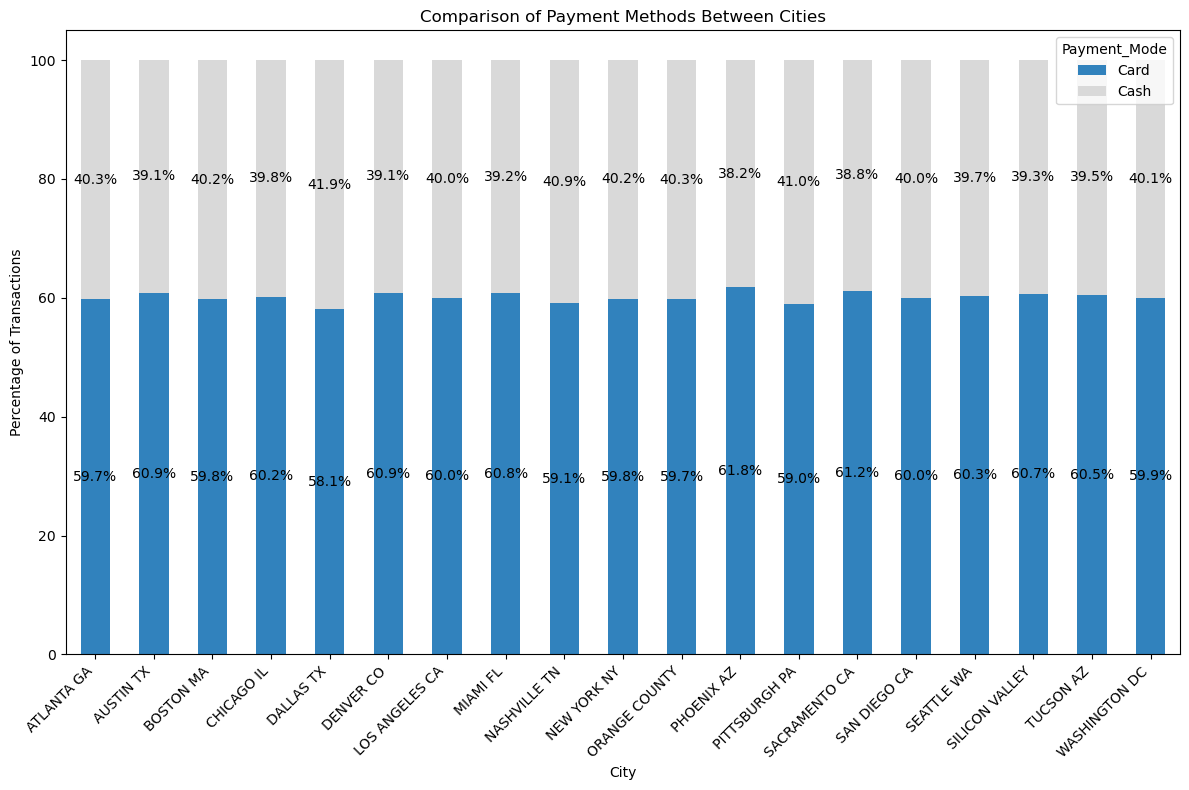

In [30]:
payment_data = df.groupby(['City', 'Payment_Mode']).size().unstack(fill_value=0)
payment_data_percent = payment_data.div(payment_data.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(12, 8))

payment_data_percent.plot(kind='bar', stacked=True, ax=ax, colormap='tab20c')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=10, color='black')

ax.set_xlabel('City')
ax.set_ylabel('Percentage of Transactions')
ax.set_title('Comparison of Payment Methods Between Cities')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

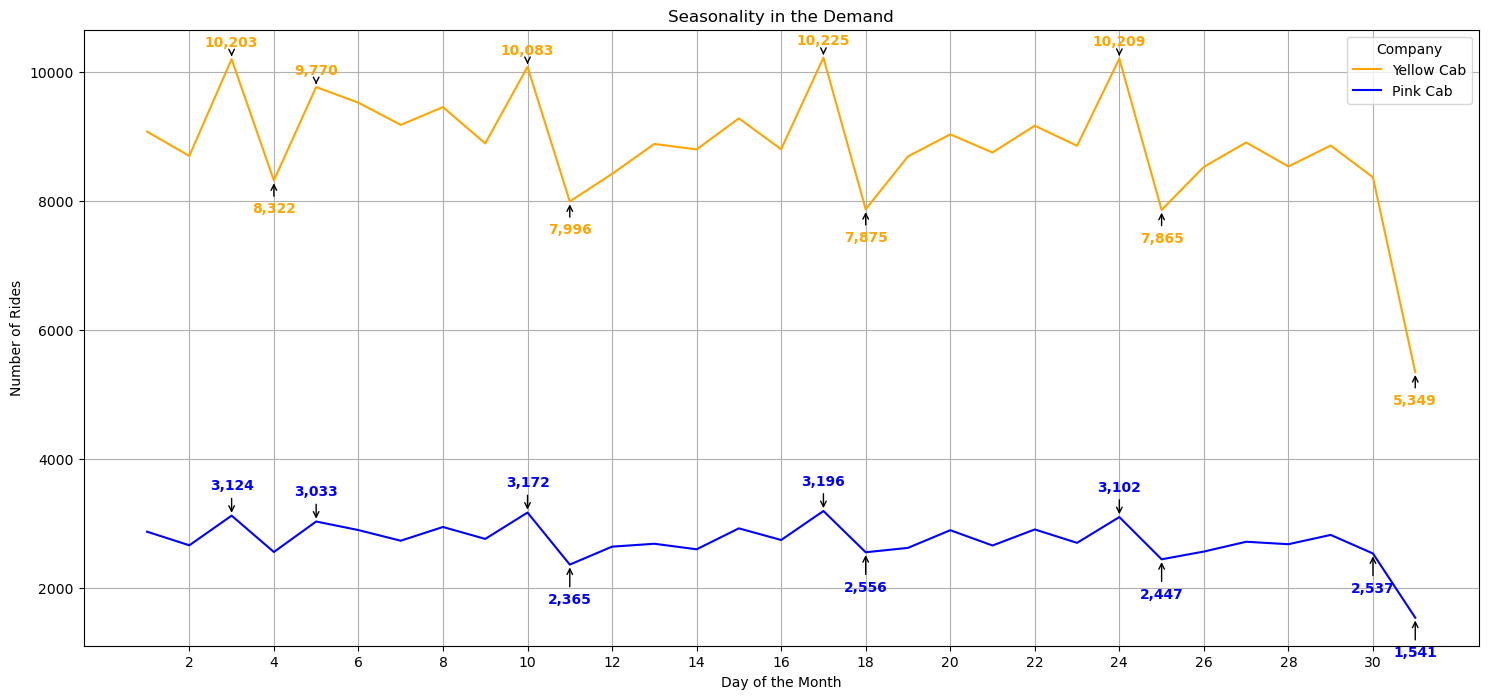

In [31]:
rides_per_day = df.groupby(['Day', 'Company']).size().unstack(fill_value=0)

plt.figure(figsize=(18, 8))
sns.lineplot(data=rides_per_day['Yellow Cab'], label='Yellow Cab', color='orange')
sns.lineplot(data=rides_per_day['Pink Cab'], label='Pink Cab', color='blue')

plt.xlabel('Day of the Month')
plt.ylabel('Number of Rides')
plt.title('Seasonality in the Demand')
plt.legend(title='Company')
plt.grid(True)

yellow_peaks = rides_per_day['Yellow Cab'].nlargest(5)
yellow_lows = rides_per_day['Yellow Cab'].nsmallest(5)
for day, rides in yellow_peaks.items():
    plt.annotate(f'{rides:,.0f}', xy=(day, rides), xytext=(day, rides + 200), ha='center', color='orange', fontsize=10, fontweight='bold', arrowprops=dict(facecolor='orange', arrowstyle='->'))
for day, rides in yellow_lows.items():
    plt.annotate(f'{rides:,.0f}', xy=(day, rides), xytext=(day, rides - 500), ha='center', color='orange', fontsize=10, fontweight='bold', arrowprops=dict(facecolor='orange', arrowstyle='->'))

pink_peaks = rides_per_day['Pink Cab'].nlargest(5)
pink_lows = rides_per_day['Pink Cab'].nsmallest(5)
for day, rides in pink_peaks.items():
    plt.annotate(f'{rides:,.0f}', xy=(day, rides), xytext=(day, rides + 400), ha='center', color='blue', fontsize=10, fontweight='bold', arrowprops=dict(facecolor='blue', arrowstyle='->'))
for day, rides in pink_lows.items():
    plt.annotate(f'{rides:,.0f}', xy=(day, rides), xytext=(day, rides - 600), ha='center', color='blue', fontsize=10, fontweight='bold', arrowprops=dict(facecolor='blue', arrowstyle='->'))

plt.xticks(ticks=range(2, 32, 2))
plt.show()

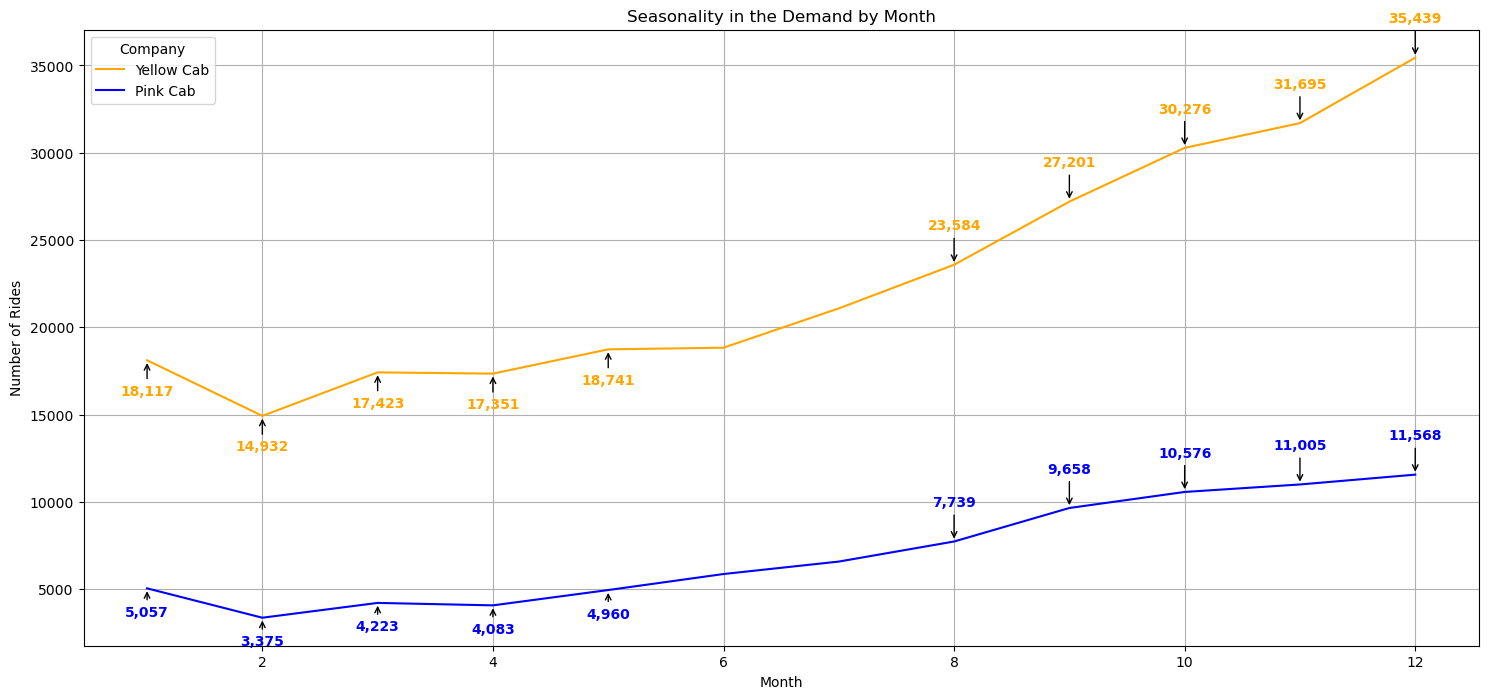

In [32]:
rides_per_month = df.groupby(['Month', 'Company']).size().unstack(fill_value=0)

plt.figure(figsize=(18, 8))

sns.lineplot(data=rides_per_month['Yellow Cab'], label='Yellow Cab', color='orange')
sns.lineplot(data=rides_per_month['Pink Cab'], label='Pink Cab', color='blue')

plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.title('Seasonality in the Demand by Month')
plt.legend(title='Company')
plt.grid(True)

yellow_peaks = rides_per_month['Yellow Cab'].nlargest(5)
yellow_lows = rides_per_month['Yellow Cab'].nsmallest(5)
for month, rides in yellow_peaks.items():
    plt.annotate(f'{rides:,.0f}', xy=(month, rides), xytext=(month, rides + 2000), ha='center', color='orange', fontsize=10, fontweight='bold', arrowprops=dict(facecolor='orange', arrowstyle='->'))
for month, rides in yellow_lows.items():
    plt.annotate(f'{rides:,.0f}', xy=(month, rides), xytext=(month, rides - 2000), ha='center', color='orange', fontsize=10, fontweight='bold', arrowprops=dict(facecolor='orange', arrowstyle='->'))

pink_peaks = rides_per_month['Pink Cab'].nlargest(5)
pink_lows = rides_per_month['Pink Cab'].nsmallest(5)
for month, rides in pink_peaks.items():
    plt.annotate(f'{rides:,.0f}', xy=(month, rides), xytext=(month, rides + 2000), ha='center', color='blue', fontsize=10, fontweight='bold', arrowprops=dict(facecolor='blue', arrowstyle='->'))
for month, rides in pink_lows.items():
    plt.annotate(f'{rides:,.0f}', xy=(month, rides), xytext=(month, rides - 1600), ha='center', color='blue', fontsize=10, fontweight='bold', arrowprops=dict(facecolor='blue', arrowstyle='->'))

plt.show()

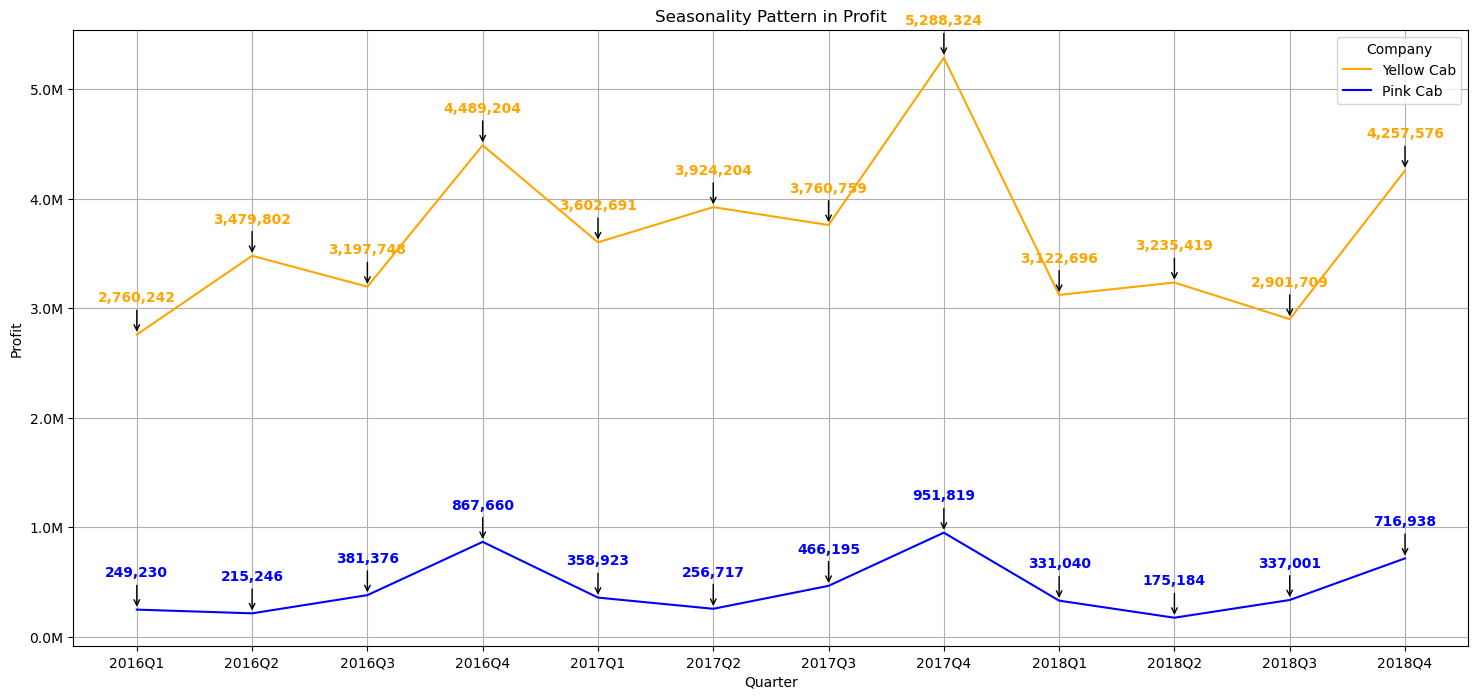

In [33]:
df['Quarter'] = df['Date'].dt.to_period('Q')

quarterly_profit = df.groupby(['Year', 'Quarter', 'Company'])['Profit'].sum().unstack(fill_value=0).reset_index()

quarterly_profit['Quarter'] = quarterly_profit['Quarter'].astype(str)  # Seaborn can't handle Quarters well so changed it to string

fig, ax = plt.subplots(figsize=(18, 8))

sns.lineplot(data=quarterly_profit, x='Quarter', y='Yellow Cab', label='Yellow Cab', color='orange')

sns.lineplot(data=quarterly_profit, x='Quarter', y='Pink Cab', label='Pink Cab', color='blue')

plt.xlabel('Quarter')
plt.ylabel('Profit')
plt.title('Seasonality Pattern in Profit')
plt.legend(title='Company')
plt.grid(True)

for idx, row in quarterly_profit.iterrows():
    quarter = row['Quarter']
    value = row['Yellow Cab']
    plt.annotate(f'{value:,.0f}', xy=(quarter, value), xytext=(quarter, value + 300000), ha='center', color='orange', fontsize=10, fontweight='bold', arrowprops=dict(facecolor='orange', arrowstyle='->'))

for idx, row in quarterly_profit.iterrows():
    quarter = row['Quarter']
    value = row['Pink Cab']
    plt.annotate(f'{value:,.0f}', xy=(quarter, value), xytext=(quarter, value + 300000), ha='center', color='blue', fontsize=10, fontweight='bold', arrowprops=dict(facecolor='blue', arrowstyle='->'))

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x*1e-6:.1f}M'))
plt.show()

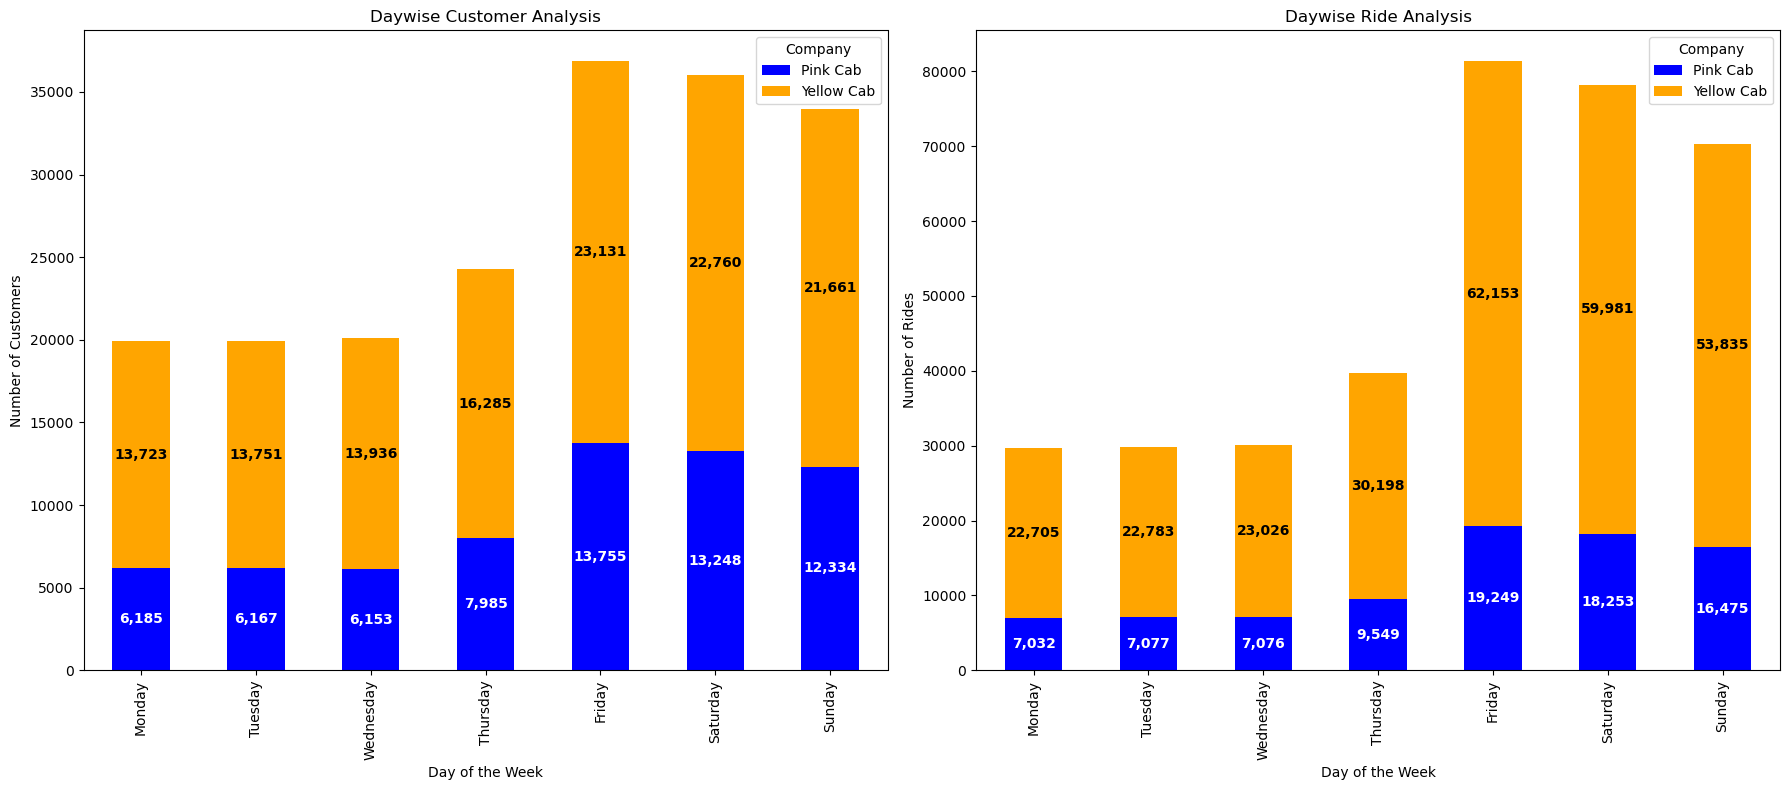

In [34]:
df['Day_of_Week'] = df['Date'].dt.day_name()

daywise_customer = df.groupby(['Day_of_Week', 'Company'])['Customer ID'].nunique().unstack(fill_value=0).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
daywise_rides = df.groupby(['Day_of_Week', 'Company'])['Date'].count().unstack(fill_value=0).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

fig, ax = plt.subplots(1, 2, figsize=(18, 8))
colors = {'Pink Cab': 'blue', 'Yellow Cab': 'orange'}

daywise_customer.plot(kind='bar', stacked=True, ax=ax[0], color=[colors['Pink Cab'], colors['Yellow Cab']])
ax[0].set_xlabel('Day of the Week')
ax[0].set_ylabel('Number of Customers')
ax[0].set_title('Daywise Customer Analysis')
ax[0].legend(title='Company')

for p in ax[0].patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    company = 'Pink Cab' if p.get_facecolor() == (0.0, 0.0, 1.0, 1.0) else 'Yellow Cab'
    color = 'white' if company == 'Pink Cab' else 'black'
    ax[0].annotate(f'{height:,.0f}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10, fontweight='bold', color=color)

daywise_rides.plot(kind='bar', stacked=True, ax=ax[1], color=[colors['Pink Cab'], colors['Yellow Cab']])
ax[1].set_xlabel('Day of the Week')
ax[1].set_ylabel('Number of Rides')
ax[1].set_title('Daywise Ride Analysis')
ax[1].legend(title='Company')

for p in ax[1].patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    company = 'Pink Cab' if p.get_facecolor() == (0.0, 0.0, 1.0, 1.0) else 'Yellow Cab'
    color = 'white' if company == 'Pink Cab' else 'black'
    ax[1].annotate(f'{height:,.0f}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10, fontweight='bold', color=color)

plt.tight_layout()
plt.show()

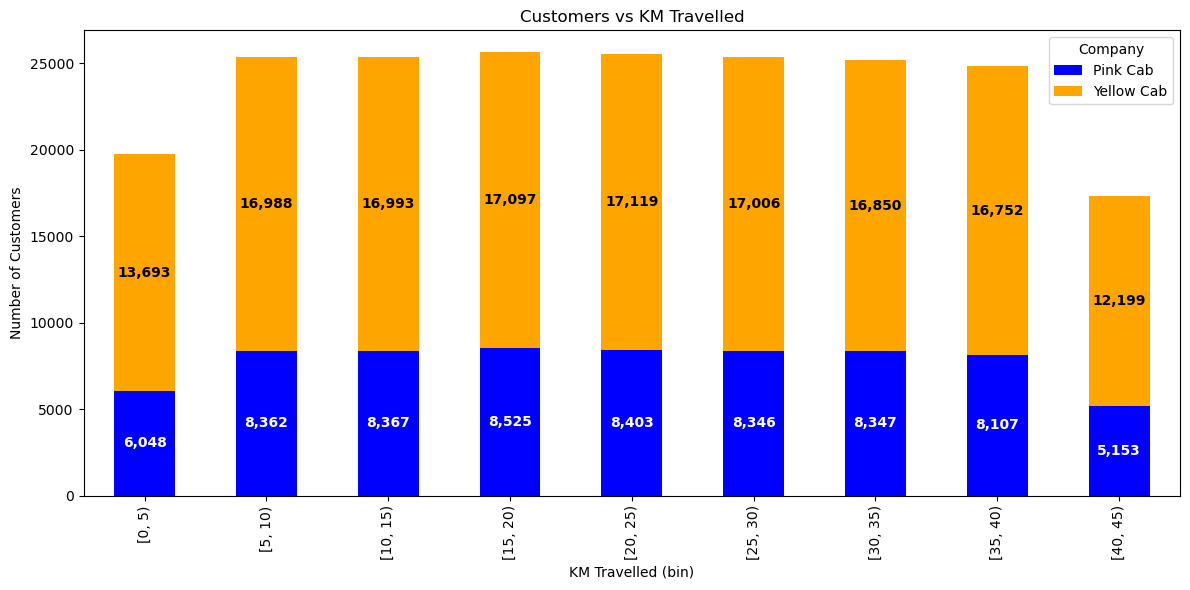

In [35]:
bins = np.arange(0, 50, 5) 
df['KM Travelled (bin)'] = pd.cut(df['KM Travelled'], bins=bins, right=False)

km_bins_customer = df.groupby(['KM Travelled (bin)', 'Company'])['Customer ID'].nunique().unstack(fill_value=0)

colors = {'Pink Cab': 'blue', 'Yellow Cab': 'orange'}

fig, ax = plt.subplots(figsize=(12, 6))

km_bins_customer.plot(kind='bar', stacked=True, ax=ax, color=[colors['Pink Cab'], colors['Yellow Cab']])
ax.set_xlabel('KM Travelled (bin)')
ax.set_ylabel('Number of Customers')
ax.set_title('Customers vs KM Travelled')
ax.legend(title='Company')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    company = 'Pink Cab' if p.get_facecolor() == (0.0, 0.0, 1.0, 1.0) else 'Yellow Cab'
    color = 'white' if company == 'Pink Cab' else 'black'
    ax.annotate(f'{height:,.0f}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10, fontweight='bold', color=color)

plt.tight_layout()
plt.show()

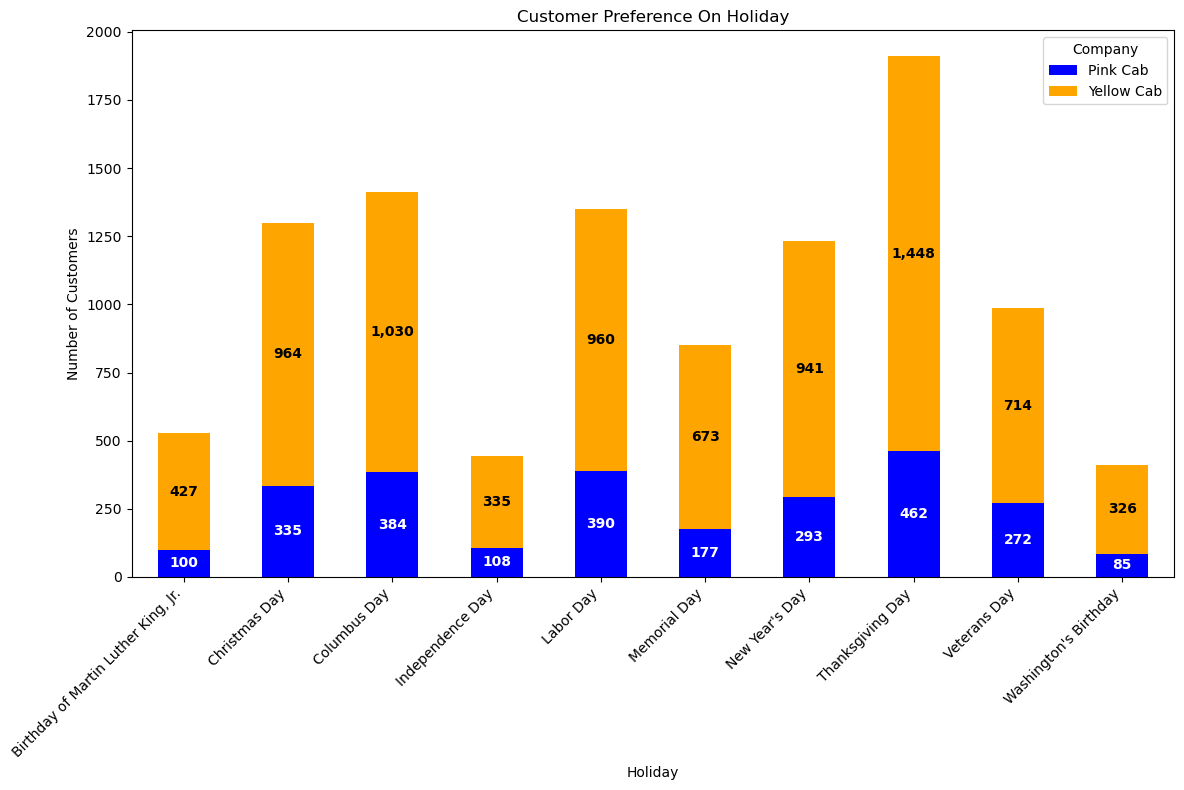

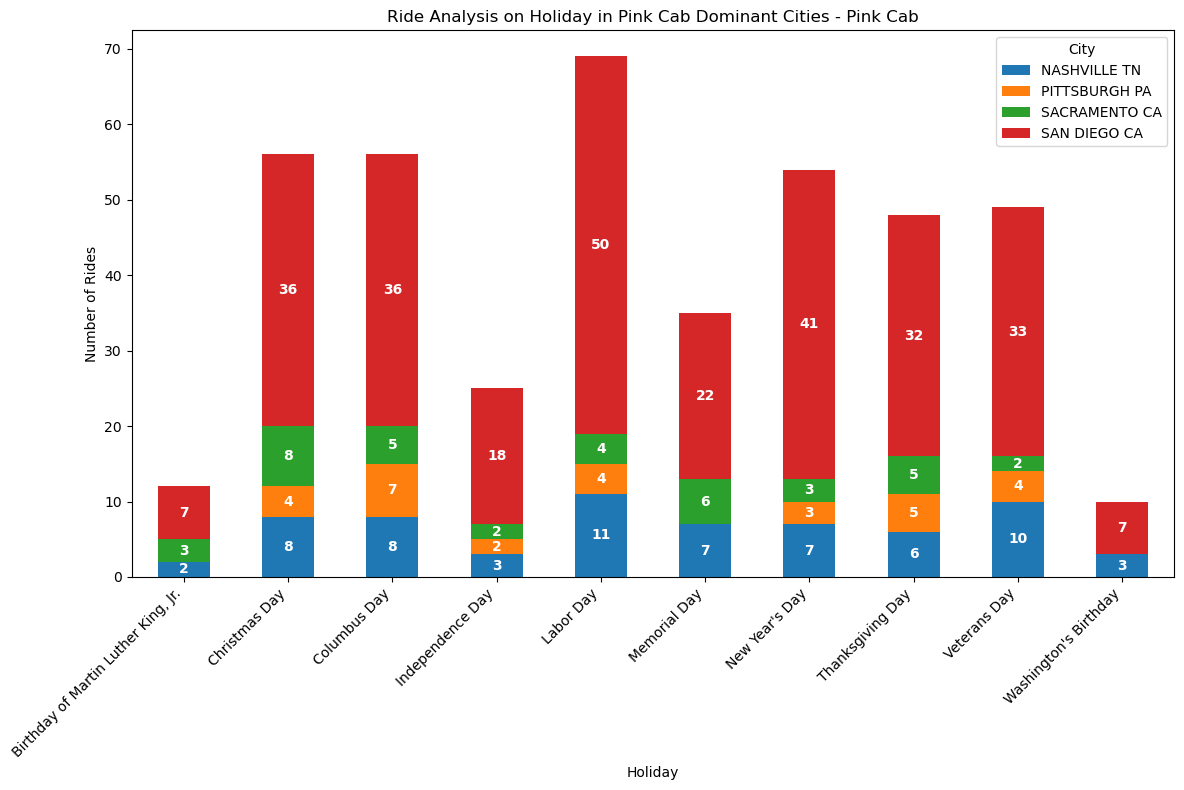

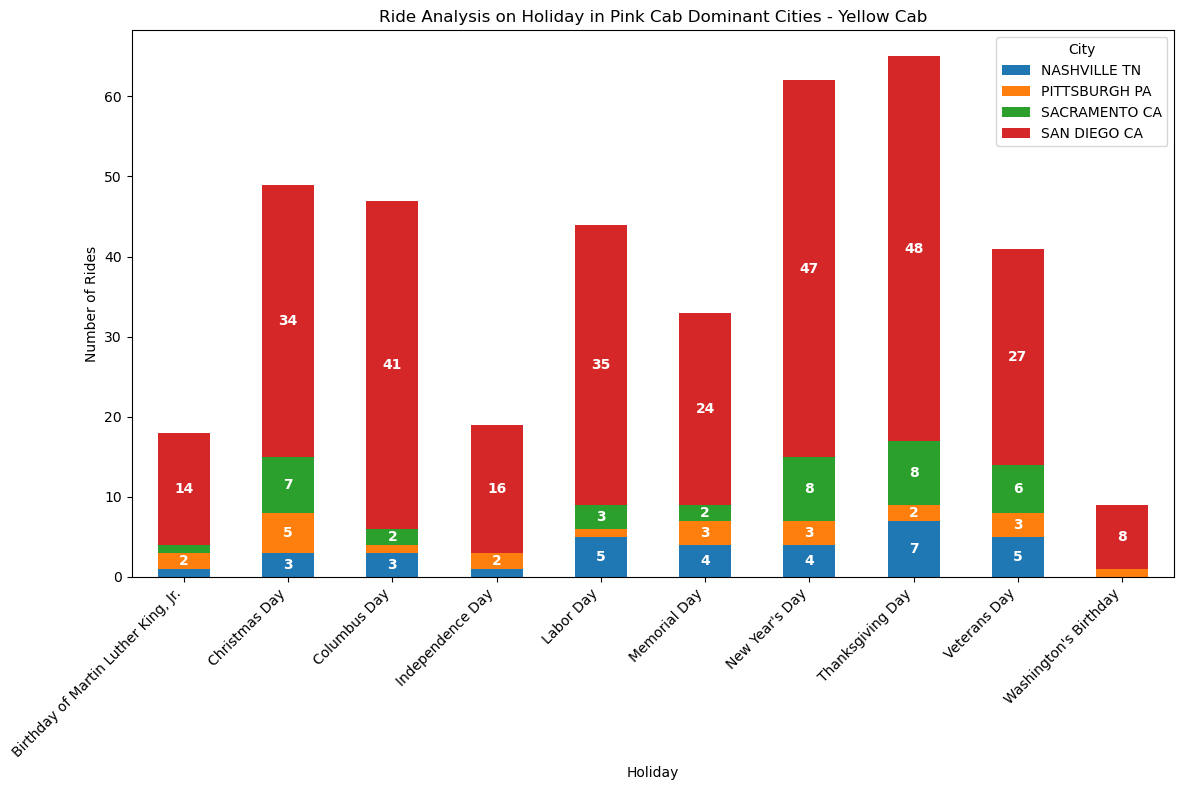

In [36]:
def get_holiday(date):
    holidays = {
        'Birthday of Martin Luther King, Jr.': pd.Timestamp(year=date.year, month=1, day=15),
        'Christmas Day': pd.Timestamp(year=date.year, month=12, day=25),
        'Columbus Day': pd.Timestamp(year=date.year, month=10, day=12),
        'Independence Day': pd.Timestamp(year=date.year, month=7, day=4),
        'Labor Day': pd.Timestamp(year=date.year, month=9, day=7),
        'Memorial Day': pd.Timestamp(year=date.year, month=5, day=25),
        'New Year\'s Day': pd.Timestamp(year=date.year, month=1, day=1),
        'Thanksgiving Day': pd.Timestamp(year=date.year, month=11, day=26),
        'Veterans Day': pd.Timestamp(year=date.year, month=11, day=11),
        'Washington\'s Birthday': pd.Timestamp(year=date.year, month=2, day=22)
    }
    for holiday, holiday_date in holidays.items():
        if date == holiday_date:
            return holiday
    return None

df['Holiday'] = df['Date'].apply(get_holiday)

df_holidays = df[df['Holiday'].notna()]

holiday_customer = df_holidays.groupby(['Holiday', 'Company'])['Customer ID'].nunique().unstack(fill_value=0)

colors = {'Pink Cab': 'blue', 'Yellow Cab': 'orange'}

fig, ax1 = plt.subplots(figsize=(12, 8))

holiday_customer.plot(kind='bar', stacked=True, ax=ax1, color=[colors['Pink Cab'], colors['Yellow Cab']])
ax1.set_xlabel('Holiday')
ax1.set_ylabel('Number of Customers')
ax1.set_title('Customer Preference On Holiday')
ax1.legend(title='Company')

for p in ax1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    company = 'Pink Cab' if p.get_facecolor() == (0.0, 0.0, 1.0, 1.0) else 'Yellow Cab'
    color = 'white' if company == 'Pink Cab' else 'black'
    if height > 0:
        ax1.annotate(f'{height:,.0f}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10, fontweight='bold', color=color)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

dominant_cities = ['NASHVILLE TN', 'PITTSBURGH PA', 'SACRAMENTO CA', 'SAN DIEGO CA']
df_dominant_cities = df_holidays[df_holidays['City'].isin(dominant_cities)]

pink_cab_data = df_dominant_cities[df_dominant_cities['Company'] == 'Pink Cab']
yellow_cab_data = df_dominant_cities[df_dominant_cities['Company'] == 'Yellow Cab']

pink_cab_rides = pink_cab_data.groupby(['Holiday', 'City'])['Date of Travel'].count().unstack(fill_value=0)
yellow_cab_rides = yellow_cab_data.groupby(['Holiday', 'City'])['Date of Travel'].count().unstack(fill_value=0)

city_colors = sns.color_palette('tab10', len(dominant_cities))

fig, ax2 = plt.subplots(figsize=(12, 8))
pink_cab_rides.plot(kind='bar', stacked=True, ax=ax2, color=city_colors)
ax2.set_xlabel('Holiday')
ax2.set_ylabel('Number of Rides')
ax2.set_title('Ride Analysis on Holiday in Pink Cab Dominant Cities - Pink Cab')
ax2.legend(title='City')

for p in ax2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 1:
        ax2.annotate(f'{height:,.0f}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10, fontweight='bold', color='white')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

fig, ax3 = plt.subplots(figsize=(12, 8))
yellow_cab_rides.plot(kind='bar', stacked=True, ax=ax3, color=city_colors)
ax3.set_xlabel('Holiday')
ax3.set_ylabel('Number of Rides')
ax3.set_title('Ride Analysis on Holiday in Pink Cab Dominant Cities - Yellow Cab')
ax3.legend(title='City')

for p in ax3.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 1:
        ax3.annotate(f'{height:,.0f}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10, fontweight='bold', color='white')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [37]:
df['YearMonth'] = df['Date'].dt.to_period('M').dt.to_timestamp()

monthly_profit = df.groupby(['YearMonth', 'Company'])['Profit'].sum().reset_index()

monthly_profit.rename(columns={'YearMonth': 'ds', 'Profit': 'y'}, inplace=True)

pink_cab_data = monthly_profit[monthly_profit['Company'] == 'Pink Cab'].drop(columns=['Company'])
yellow_cab_data = monthly_profit[monthly_profit['Company'] == 'Yellow Cab'].drop(columns=['Company'])

In [38]:
from prophet import Prophet

pink_cab_model = Prophet()
pink_cab_model.fit(pink_cab_data)

yellow_cab_model = Prophet()
yellow_cab_model.fit(yellow_cab_data)

21:04:58 - cmdstanpy - INFO - Chain [1] start processing
21:04:58 - cmdstanpy - INFO - Chain [1] done processing
21:04:58 - cmdstanpy - INFO - Chain [1] start processing
21:04:58 - cmdstanpy - INFO - Chain [1] done processing


In [39]:
future_pink_cab = pink_cab_model.make_future_dataframe(periods=12, freq='M')
future_yellow_cab = yellow_cab_model.make_future_dataframe(periods=12, freq='M')

forecast_pink_cab = pink_cab_model.predict(future_pink_cab)
forecast_yellow_cab = yellow_cab_model.predict(future_yellow_cab)

forecast_pink_cab = forecast_pink_cab[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_yellow_cab = forecast_yellow_cab[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


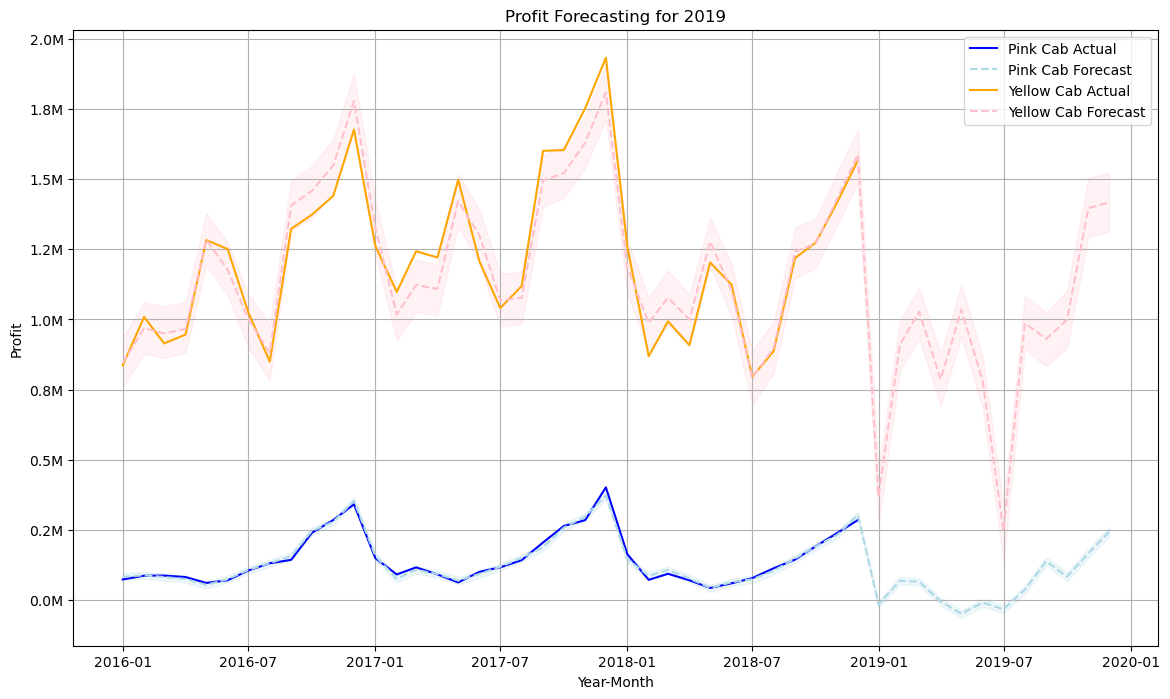

In [40]:
plt.figure(figsize=(14, 8))

plt.plot(pink_cab_data['ds'], pink_cab_data['y'], label='Pink Cab Actual', color='blue')
plt.plot(forecast_pink_cab['ds'], forecast_pink_cab['yhat'], linestyle='--', label='Pink Cab Forecast', color='lightblue')
plt.fill_between(forecast_pink_cab['ds'], forecast_pink_cab['yhat_lower'], forecast_pink_cab['yhat_upper'], color='lightblue', alpha=0.2)

plt.plot(yellow_cab_data['ds'], yellow_cab_data['y'], label='Yellow Cab Actual', color='orange')
plt.plot(forecast_yellow_cab['ds'], forecast_yellow_cab['yhat'], linestyle='--', label='Yellow Cab Forecast', color='pink')
plt.fill_between(forecast_yellow_cab['ds'], forecast_yellow_cab['yhat_lower'], forecast_yellow_cab['yhat_upper'], color='pink', alpha=0.2)

ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x / 1e6:.1f}M'))

plt.title('Profit Forecasting for 2019')
plt.xlabel('Year-Month')
plt.ylabel('Profit')
plt.legend()
plt.grid(True)
plt.show()


In [41]:
monthly_rides = df.groupby(['YearMonth', 'Company']).size().reset_index(name='Rides')

monthly_rides.rename(columns={'YearMonth': 'ds', 'Rides': 'y'}, inplace=True)

pink_cab_data = monthly_rides[monthly_rides['Company'] == 'Pink Cab'].drop(columns=['Company'])
yellow_cab_data = monthly_rides[monthly_rides['Company'] == 'Yellow Cab'].drop(columns=['Company'])

In [42]:
pink_cab_model = Prophet()
pink_cab_model.fit(pink_cab_data)

yellow_cab_model = Prophet()
yellow_cab_model.fit(yellow_cab_data)

21:04:59 - cmdstanpy - INFO - Chain [1] start processing


21:04:59 - cmdstanpy - INFO - Chain [1] done processing
21:04:59 - cmdstanpy - INFO - Chain [1] start processing
21:04:59 - cmdstanpy - INFO - Chain [1] done processing


In [43]:
future_pink_cab = pink_cab_model.make_future_dataframe(periods=12, freq='M')
future_yellow_cab = yellow_cab_model.make_future_dataframe(periods=12, freq='M')

forecast_pink_cab = pink_cab_model.predict(future_pink_cab)
forecast_yellow_cab = yellow_cab_model.predict(future_yellow_cab)

forecast_pink_cab = forecast_pink_cab[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_yellow_cab = forecast_yellow_cab[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


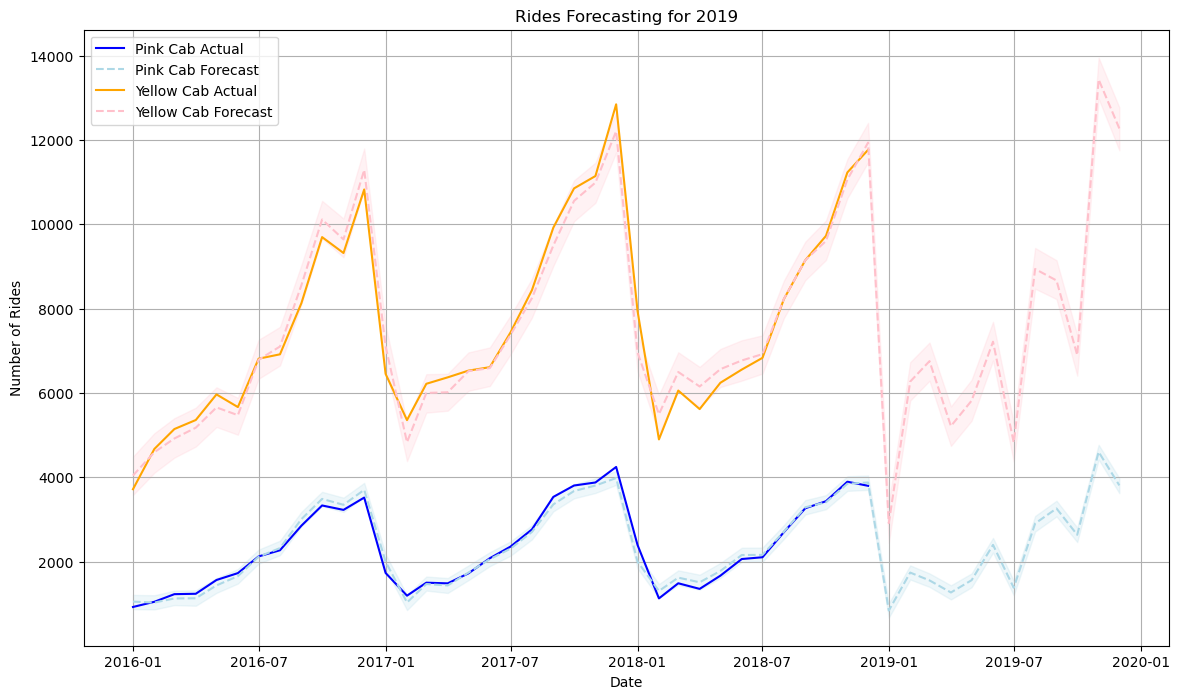

In [44]:
plt.figure(figsize=(14, 8))

plt.plot(pink_cab_data['ds'], pink_cab_data['y'], label='Pink Cab Actual', color='blue')
plt.plot(forecast_pink_cab['ds'], forecast_pink_cab['yhat'], linestyle='--', label='Pink Cab Forecast', color='lightblue')
plt.fill_between(forecast_pink_cab['ds'], forecast_pink_cab['yhat_lower'], forecast_pink_cab['yhat_upper'], color='lightblue', alpha=0.2)

plt.plot(yellow_cab_data['ds'], yellow_cab_data['y'], label='Yellow Cab Actual', color='orange')
plt.plot(forecast_yellow_cab['ds'], forecast_yellow_cab['yhat'], linestyle='--', label='Yellow Cab Forecast', color='pink')
plt.fill_between(forecast_yellow_cab['ds'], forecast_yellow_cab['yhat_lower'], forecast_yellow_cab['yhat_upper'], color='pink', alpha=0.2)

plt.title('Rides Forecasting for 2019')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.legend()
plt.grid(True)
plt.show()

# Hypothesis #1

**Cities with higher proportions of Pink Cab users also show higher customer satisfaction rates.** 

In [49]:
df['Customer_Satisfaction'] = df['Price Charged'] / df['Cost of Trip']
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['Customer_Satisfaction'])

city_users = df.groupby(['City', 'Company'])['Customer ID'].nunique().reset_index()
city_users_pivot = city_users.pivot(index='City', columns='Company', values='Customer ID').fillna(0)

city_users_pivot['Total_Users'] = city_users_pivot['Pink Cab'] + city_users_pivot['Yellow Cab']
city_users_pivot['Pink_Cab_Proportion'] = city_users_pivot['Pink Cab'] / city_users_pivot['Total_Users']

city_users_pivot.reset_index(inplace=True)

In [50]:
pink_cab_satisfaction = df[df['Company'] == 'Pink Cab'].groupby('City')['Customer_Satisfaction'].mean().reset_index()
pink_cab_satisfaction.rename(columns={'Customer_Satisfaction': 'Pink_Cab_Satisfaction'}, inplace=True)


In [51]:
city_analysis = pd.merge(city_users_pivot, pink_cab_satisfaction, on='City')

correlation = city_analysis[['Pink_Cab_Proportion', 'Pink_Cab_Satisfaction']].corr()
correlation_value = correlation.loc['Pink_Cab_Proportion', 'Pink_Cab_Satisfaction']


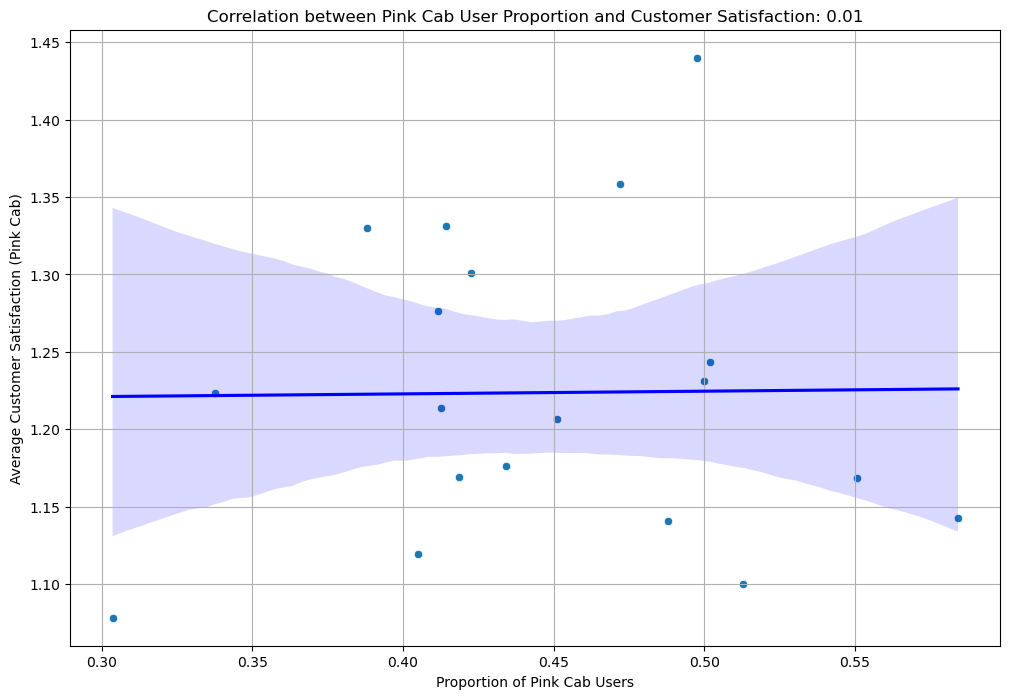

In [52]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=city_analysis, x='Pink_Cab_Proportion', y='Pink_Cab_Satisfaction')
sns.regplot(data=city_analysis, x='Pink_Cab_Proportion', y='Pink_Cab_Satisfaction', scatter=False, color='blue')
plt.xlabel('Proportion of Pink Cab Users')
plt.ylabel('Average Customer Satisfaction (Pink Cab)')
plt.title(f'Correlation between Pink Cab User Proportion and Customer Satisfaction: {correlation_value:.2f}')
plt.grid(True)
plt.show()

The plot and correlation analysis reveals a negligible linear relationship between the proportion of Pink Cab users and customer satisfaction rates, with a correlation value of **0.01**. The regression line is nearly flat, and the broad confidence interval indicates no significant trend. Consequently, the data does not support the hypothesis, showing no evidence that an increase in the proportion of Pink Cab users correlates with higher customer satisfaction in the analyzed cities.


# Hypothesis #2

**There is a positive correlation between the proportion of Yellow Cab users and the overall profit in a city.**

In [53]:
city_users = df.groupby(['City', 'Company'])['Customer ID'].nunique().reset_index()
city_users_pivot = city_users.pivot(index='City', columns='Company', values='Customer ID').fillna(0)

city_users_pivot['Total_Users'] = city_users_pivot['Pink Cab'] + city_users_pivot['Yellow Cab']
city_users_pivot['Yellow_Cab_Proportion'] = city_users_pivot['Yellow Cab'] / city_users_pivot['Total_Users']

city_users_pivot.reset_index(inplace=True)

In [54]:
city_profit = df.groupby('City')['Profit'].sum().reset_index()
city_profit.rename(columns={'Profit': 'Total_Profit'}, inplace=True)

In [55]:
city_analysis = pd.merge(city_users_pivot, city_profit, on='City')

correlation = city_analysis[['Yellow_Cab_Proportion', 'Total_Profit']].corr()
correlation_value = correlation.loc['Yellow_Cab_Proportion', 'Total_Profit']

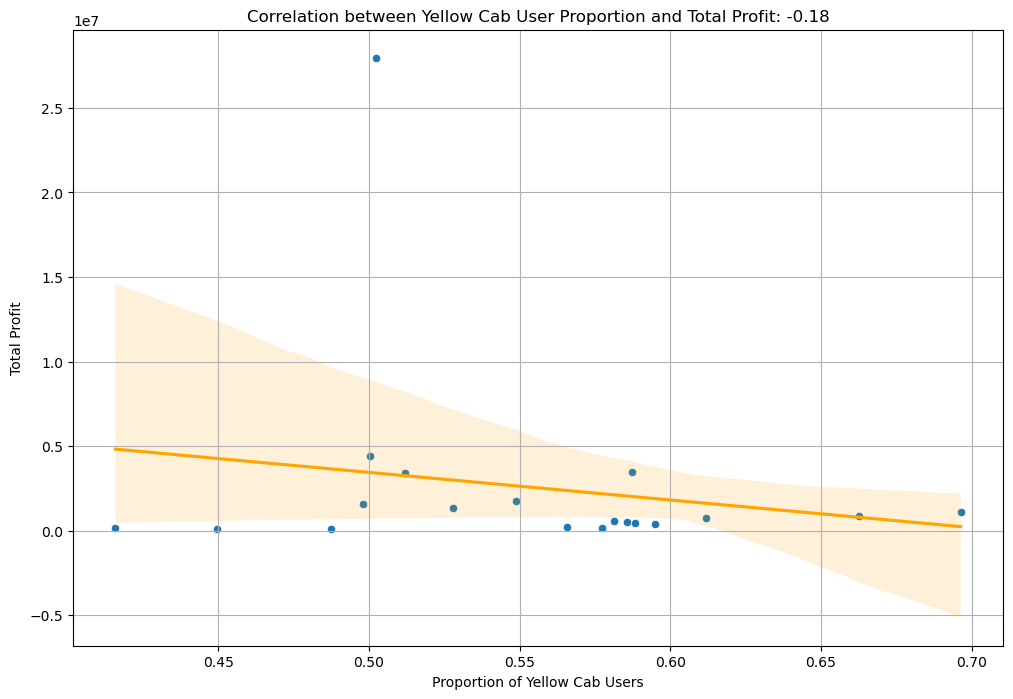

In [57]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=city_analysis, x='Yellow_Cab_Proportion', y='Total_Profit')
sns.regplot(data=city_analysis, x='Yellow_Cab_Proportion', y='Total_Profit', scatter=False, color='orange')
plt.xlabel('Proportion of Yellow Cab Users')
plt.ylabel('Total Profit')
plt.title(f'Correlation between Yellow Cab User Proportion and Total Profit: {correlation_value:.2f}')
plt.grid(True)
plt.show()

The plot and correlation analysis revealed a negative correlation value of **-0.18**. This suggests a weak negative relationship between the proportion of Yellow Cab users and the overall profit in the analyzed cities. The regression line in the plot slopes downward slightly, indicating that cities with a higher proportion of Yellow Cab users tend to have slightly lower overall profits. Consequently, the data does not support the hypothesis of a positive correlation between Yellow Cab user proportion and overall profit in a city.

# Hypothesis #3

**The forecasted profits for Yellow Cab in 2019 are expected to be higher than those for Pink Cab.**

In [59]:
forecast_pink_cab_2019 = forecast_pink_cab[['ds', 'yhat']][forecast_pink_cab['ds'].dt.year == 2019]
forecast_yellow_cab_2019 = forecast_yellow_cab[['ds', 'yhat']][forecast_yellow_cab['ds'].dt.year == 2019]

In [60]:
total_forecast_pink_cab_2019 = forecast_pink_cab_2019['yhat'].sum()
total_forecast_yellow_cab_2019 = forecast_yellow_cab_2019['yhat'].sum()

print(f"Forecasted total profit for Pink Cab in 2019: {total_forecast_pink_cab_2019:.2f}")
print(f"Forecasted total profit for Yellow Cab in 2019: {total_forecast_yellow_cab_2019:.2f}")


Forecasted total profit for Pink Cab in 2019: 27138.12
Forecasted total profit for Yellow Cab in 2019: 86320.82


These results indicate that the forecasted profits for Yellow Cab in 2019 are significantly higher than those for Pink Cab, thus supporting the hypothesis.